# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Heriswaya
- **Email:** heriswaya2014@gmail.com
- **ID Dicoding:** heriswaya_A5Dd

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara dari waktu ke waktu di setiap stasiun?
- Stasiun mana yang memiliki rata-rata tingkat polusi tertinggi dan terendah?
- Bagaimana perbandingan tingkat polusi udara pada pagi, siang, dan malam hari di setiap stasiun?

## Import Semua Packages/Library yang Digunakan

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

### Gathering Data

In [3]:
aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [4]:
changping_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [5]:
dingling_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [6]:
dongsi_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [7]:
guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

In [8]:
gucheng_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [9]:
huairou_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

In [10]:
nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [11]:
shunyi_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [12]:
tiantan_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [14]:
wanliu_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

In [15]:
wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/heriswaya/Heriswaya-AnalisisAirQualityDataset/main/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

**Insight:**
- Bisa membantu mengetahui seperti apa kualitas udara pada setiap station
- Dapat membantu mengetahui kualitas udara berdasarkan parameter yang ada pada setiap tahun di setiap lokasi

### Assessing Data

#### Menilai tabel `aotizhongxin_df`

In [ ]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
aotizhongxin_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

#### Menilai tabel `changping_df`

In [ ]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
changping_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

#### Menilai tabel `dingling_df`

In [ ]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dingling_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

#### Menilai tabel `dongsi_df`

In [ ]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dongsi_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

#### Menilai tabel `guanyuan_df`

In [ ]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
guanyuan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

#### Menilai tabel `gucheng_df`

In [ ]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
gucheng_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

#### Menilai tabel `huairou_df`

In [ ]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
huairou_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

#### Menilai tabel `nongzhanguan_df`

In [ ]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
nongzhanguan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

#### Menilai tabel `shunyi_df`

In [ ]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
shunyi_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

#### Menilai tabel `tiantan_df`

In [ ]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
tiantan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

#### Menilai tabel `wanliu_df`

In [ ]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
wanliu_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

#### Menilai tabel `wanshouxigong_df`

In [ ]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
wanshouxigong_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

#### **Insight:**
- Mengetahui apakah dataset bersih atau perlu diperbaiki (missing values, duplikasi)
- Memberikan informasi tentang jumlah baris & kolom dan tipe data pada setiap station
- Memberikan rangkuman statistik seperti mean, median, min, max, standar deviasi, dll. pada setiap station

### Cleaning Data
---
Terlihat pada gathering data di atas, tidak ada tabel yang memiliki duplikasi data. Hanya ada data yang kosong, sehingga data yang kosong tersebut akan diisi dengan cara:
- mode (nilai yang sering muncul) untuk `wd` karena kategorikal.
- interpolate untuk data float (PM2.5, PM10, dst) karena cocok untuk data time-series.

#### Membersihkan tabel `aotizhongxin_df`

Missing values

In [59]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
aotizhongxin_df['wd'] = aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0])

In [62]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_aotizhongxin = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
aotizhongxin_df[float_columns_aotizhongxin] = aotizhongxin_df[float_columns_aotizhongxin].interpolate()

In [63]:
# Cek
aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `changping_df`

Missing values

In [16]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
changping_df['wd'] = changping_df['wd'].fillna(changping_df['wd'].mode()[0])

In [64]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_changping = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
changping_df[float_columns_changping] = changping_df[float_columns_changping].interpolate()

In [65]:
# Cek
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `dingling_df`

Missing values

In [22]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
dingling_df['wd'] = dingling_df['wd'].fillna(dingling_df['wd'].mode()[0])

In [66]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_dingling = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
dingling_df[float_columns_dingling] = dingling_df[float_columns_dingling].interpolate()

In [67]:
# Cek
dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [68]:
# Masih ada data yang kosong, shg akan digunakan `Forward/Backward Fill`
dingling_df['NO2'] = dingling_df['NO2'].ffill().bfill()

In [69]:
print(dingling_df['NO2'].isna().sum())  # Cek apakah masih ada NaN

0


#### Membersihkan tabel `dongsi_df`

Missing values

In [19]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
dongsi_df['wd'] = dongsi_df['wd'].fillna(dongsi_df['wd'].mode()[0])

In [70]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_dongsi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
dongsi_df[float_columns_dongsi] = dongsi_df[float_columns_dongsi].interpolate()

In [72]:
# Cek
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `guanyuan_df`

Missing values

In [25]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
guanyuan_df['wd'] = guanyuan_df['wd'].fillna(guanyuan_df['wd'].mode()[0])

In [73]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_guanyuan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
guanyuan_df[float_columns_guanyuan] = guanyuan_df[float_columns_guanyuan].interpolate()

In [74]:
# Cek
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `gucheng_df`

Missing values

In [28]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
gucheng_df['wd'] = gucheng_df['wd'].fillna(gucheng_df['wd'].mode()[0])

In [75]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_gucheng = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
gucheng_df[float_columns_gucheng] = gucheng_df[float_columns_gucheng].interpolate()

In [77]:
# Cek
gucheng_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `huairou_df`

Missing values

In [37]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
huairou_df['wd'] = huairou_df['wd'].fillna(huairou_df['wd'].mode()[0])

In [91]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_huairou = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
huairou_df[float_columns_huairou] = huairou_df[float_columns_huairou].interpolate()

In [92]:
# Cek
huairou_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `nongzhanguan_df`

Missing values

In [40]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
nongzhanguan_df['wd'] = nongzhanguan_df['wd'].fillna(nongzhanguan_df['wd'].mode()[0])

In [89]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_nongzhanguan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
nongzhanguan_df[float_columns_nongzhanguan] = nongzhanguan_df[float_columns_nongzhanguan].interpolate()

In [90]:
# Cek
nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `shunyi_df`

Missing values

In [43]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
shunyi_df['wd'] = shunyi_df['wd'].fillna(shunyi_df['wd'].mode()[0])

In [87]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_shunyi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
shunyi_df[float_columns_shunyi] = shunyi_df[float_columns_shunyi].interpolate()

In [88]:
# Cek
shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `tiantan_df`

Missing values

In [46]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
tiantan_df['wd'] = tiantan_df['wd'].fillna(tiantan_df['wd'].mode()[0])

In [85]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_tiantan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
tiantan_df[float_columns_tiantan] = tiantan_df[float_columns_tiantan].interpolate()

In [86]:
# Cek
tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `wanliu_df`

Missing values

In [49]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
wanliu_df['wd'] = wanliu_df['wd'].fillna(wanliu_df['wd'].mode()[0])

In [83]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_wanliu = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
wanliu_df[float_columns_wanliu] = wanliu_df[float_columns_wanliu].interpolate()

In [84]:
# Cek
wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `wanshouxigong_df`

Missing values

In [52]:
# wd (wind direction) bisa menggunakan mode (nilai yang paling sering muncul)
wanshouxigong_df['wd'] = wanshouxigong_df['wd'].fillna(wanshouxigong_df['wd'].mode()[0])

In [79]:
# interpolate() akan mengisi missing values berdasarkan pola data sebelum dan sesudahnya.
# Daftar kolom yang akan diinterpolasi
float_columns_wanshouxigong = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolasi untuk setiap kolom
wanshouxigong_df[float_columns_wanshouxigong] = wanshouxigong_df[float_columns_wanshouxigong].interpolate()

In [80]:
# Cek
wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### **Insight:**
- Tren polusi udara lebih jelas dan tidak terdistorsi.
- Tidak ada lagi missing values, dataset lebih siap untuk analisis lanjutan.

## Exploratory Data Analysis (EDA)

### Explore `aotizhongxin_df`

In [93]:
print(aotizhongxin_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour       PM2.5        PM10    SO2  \
400      401  2013      3   17    16  362.000000  383.000000   94.0   
11921  11922  2014      7   10    17   17.000000   17.000000    2.0   
8563    8564  2014      2   20    19  343.000000  357.000000   41.0   
1927    1928  2013      5   20     7   27.000000   91.000000   16.0   
3542    3543  2013      7   26    14   53.000000   47.000000    7.0   
5311    5312  2013     10    8     7   38.000000   65.000000   16.0   
25375  25376  2016      1   22     7    7.000000   10.000000    2.0   
29838  29839  2016      7   26     6   30.923077   36.461538    2.0   
8459    8460  2014      2   16    11  362.000000  329.000000  120.0   
16715  16716  2015      1   26    11   20.000000   32.000000   21.0   

              NO2           CO          O3  TEMP    PRES  DEWP  RAIN   wd  \
400    106.000000  2299.000000  105.000000  15.3   996.2   4.0   0.0   SW   
11921   30.000000   200.000000  130.000000  34.7   991.5  13.0  

In [94]:
print(aotizhongxin_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

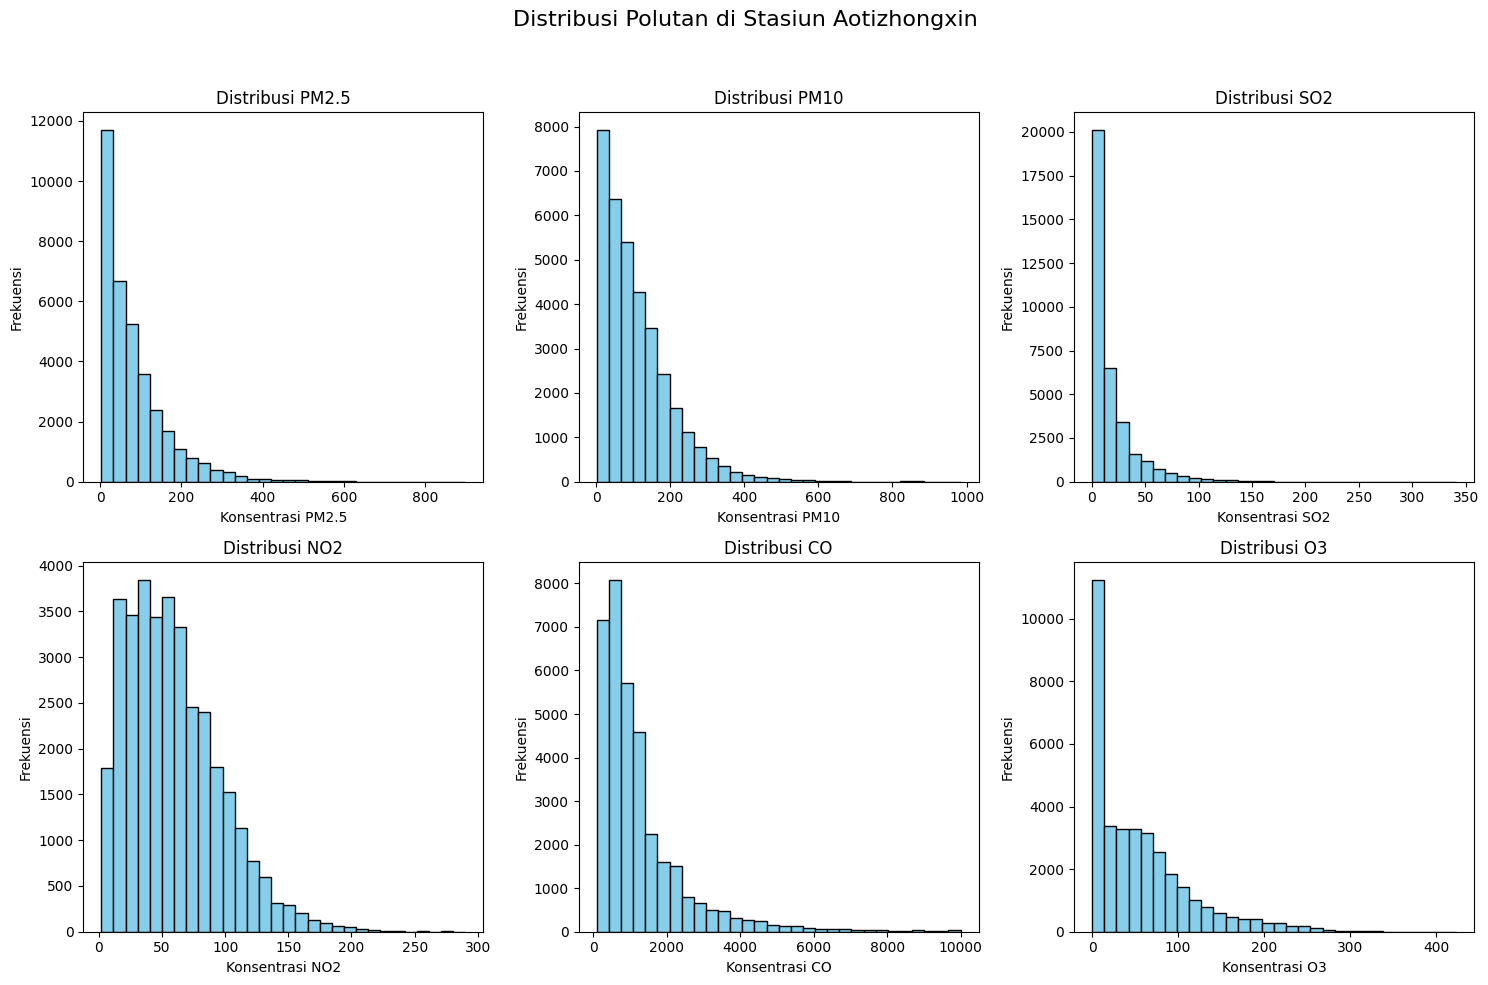

In [95]:
# Histogram untuk melihat sebaran polutan.
pollutants_aotizhongxin = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun Aotizhongxin", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_aotizhongxin):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(aotizhongxin_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

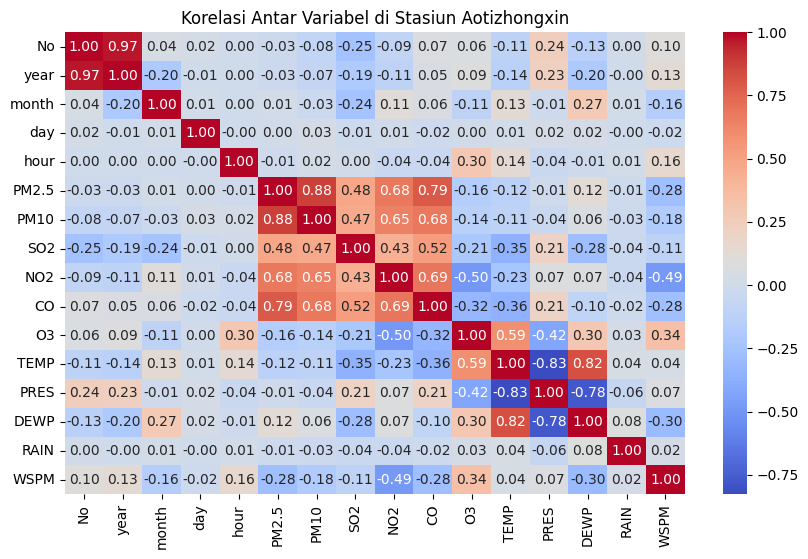

In [96]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_aotizhongxin = aotizhongxin_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(aotizhongxin_df[num_cols_aotizhongxin].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun Aotizhongxin')
plt.show()

### Explore `changping_df`

In [101]:
print(changping_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO     O3  \
1981    1982  2013      5   22    13   96.0  188.0  44.0  28.0  1000.0  207.0   
25871  25872  2016      2   11    23  146.0  149.0  14.0  85.0  3400.0    2.0   
3737    3738  2013      8    3    17   31.0   52.0   5.0  16.0   500.0  250.0   
34437  34438  2017      2    2    21   80.0   80.0  33.0  61.0  1800.0   23.0   
30898  30899  2016      9    8    10   17.0   43.0   7.0  50.0   700.0   32.0   
31818  31819  2016     10   16    18  131.0  131.0   2.0  59.0  1100.0   35.0   
28140  28141  2016      5   16    12   11.0   13.0   2.0  21.0   500.0   83.0   
31200  31201  2016      9   21     0   19.0   37.0   2.0  31.0   500.0   50.0   
7749    7750  2014      1   17    21   33.0   38.0  30.0  59.0  1000.0    9.0   
34115  34116  2017      1   20    11    7.0   24.0   5.0  13.0   700.0   52.0   

         TEMP    PRES  DEWP  RAIN   wd  WSPM    station  
1981   28.700  1001.4   8.9   0.0  SSE   2.9  Chan

In [102]:
print(changping_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

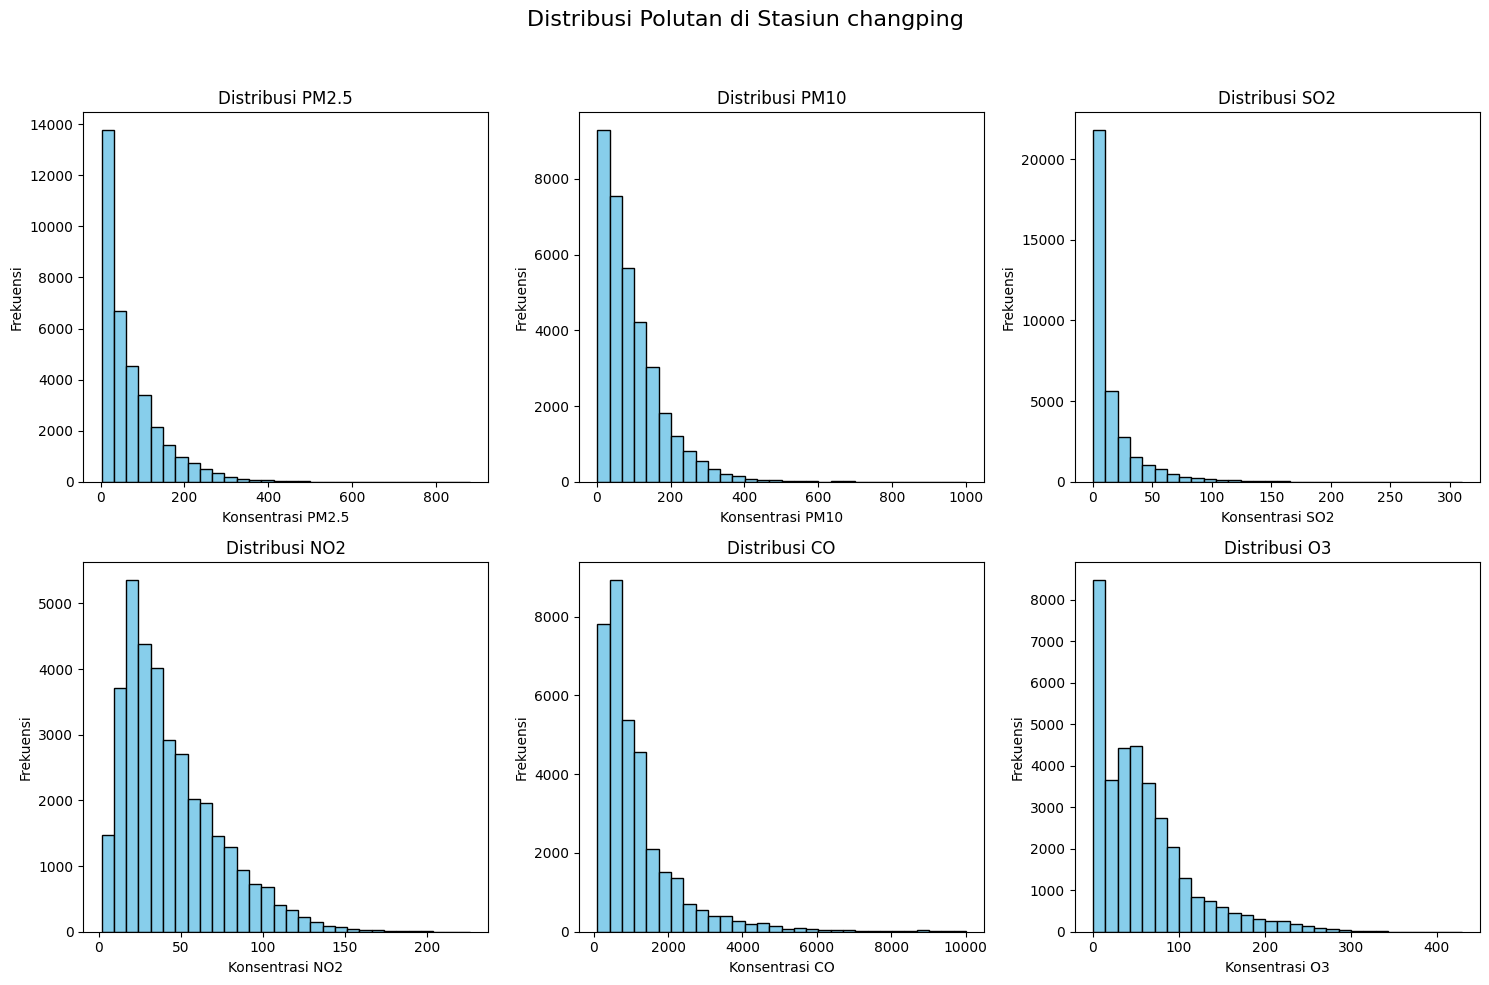

In [103]:
# Histogram untuk melihat sebaran polutan.
pollutants_changping = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun changping", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_changping):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(changping_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

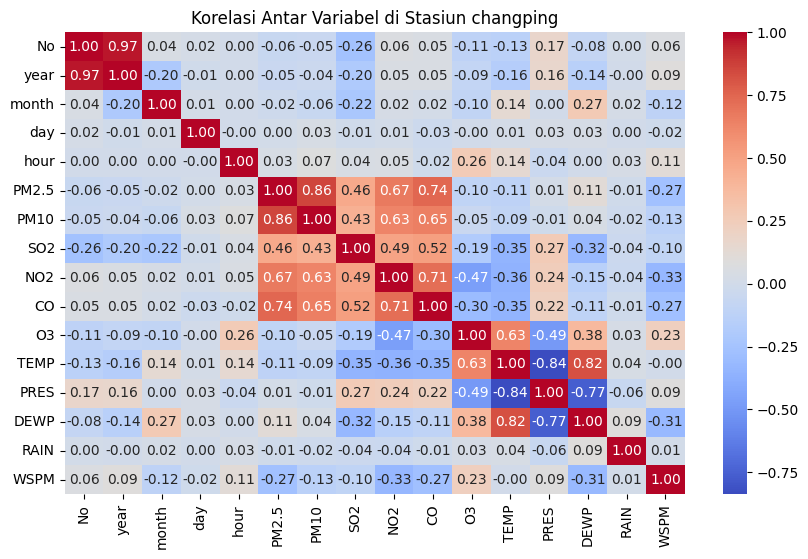

In [104]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_changping = changping_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(changping_df[num_cols_changping].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun changping')
plt.show()

### Explore `dingling_df`

In [140]:
print(dingling_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
8312    8313  2014      2   10     8   11.0   15.0  31.0000   8.0000   500.0   
5799    5800  2013     10   28    15  298.0  337.0  60.5472  80.4776  1500.0   
33145  33146  2016     12   11     1  106.0  109.0  24.0000  71.0000  2900.0   
16575  16576  2015      1   20    15  104.0  118.0  60.0000  57.0000  1600.0   
33813  33814  2017      1    7    21   35.0   35.0  15.0000  21.0000   600.0   
5800    5801  2013     10   28    16  282.0  330.0  55.4064  81.2988  1500.0   
17320  17321  2015      2   20    16  129.0  129.0  14.0000  42.0000  1700.0   
7726    7727  2014      1   16    22  242.0  258.0  63.0000  83.0000  2700.0   
27513  27514  2016      4   20     9  104.0  104.0  24.0000  39.0000  1400.0   
29438  29439  2016      7    9    14   84.0   84.0   4.0000  24.0000   800.0   

               O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
8312    55.000000  -6.8  1028.8 -21.1   0.0   NE   0

In [139]:
print(dingling_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

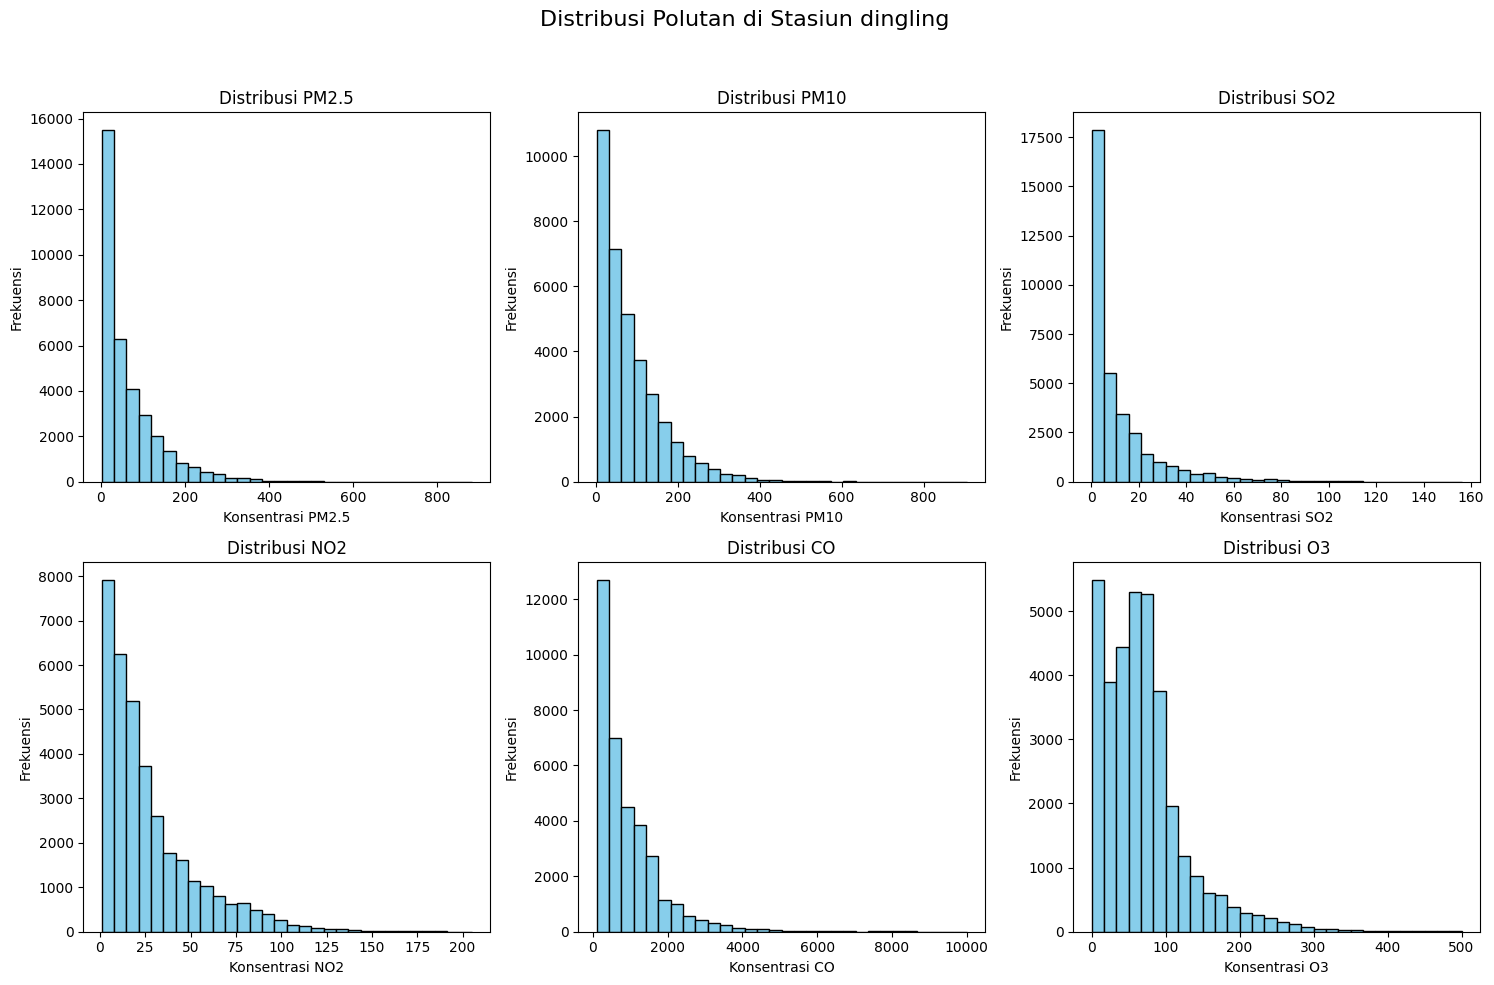

In [138]:
# Histogram untuk melihat sebaran polutan.
pollutants_dingling = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun dingling", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_dingling):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(dingling_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

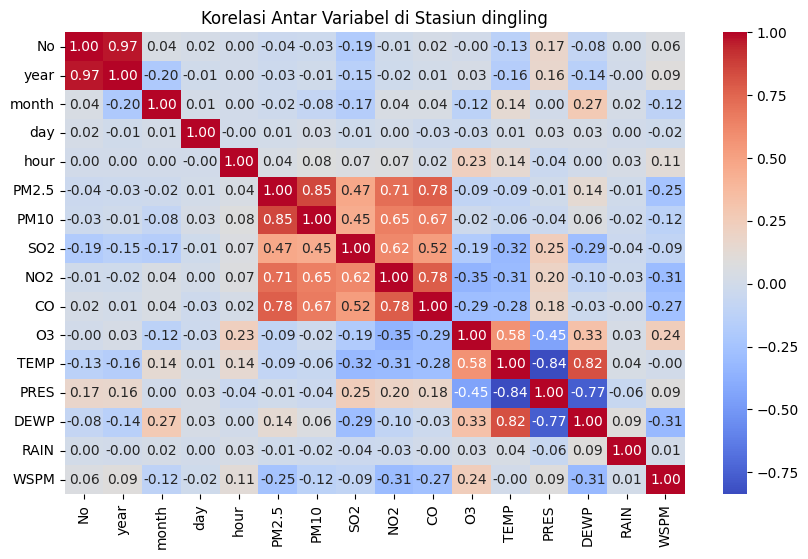

In [137]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_dingling = dingling_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(dingling_df[num_cols_dingling].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun dingling')
plt.show()

### Explore `dongsi_df`

In [136]:
print(dongsi_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10      SO2       NO2  \
21244  21245  2015      8    3     4  105.0  105.0   2.0000   38.0000   
17998  17999  2015      3   20    22   50.0  211.0  10.0000   90.0000   
22157  22158  2015      9   10     5    5.0    9.0   2.0000   24.0000   
4642    4643  2013      9   10    10   37.0   37.0  22.0000   31.0000   
31890  31891  2016     10   19    18  293.0  293.0  10.0000  103.0000   
13532  13533  2014      9   15    20   17.0   65.0   2.0000   40.0000   
32614  32615  2016     11   18    22  186.0  186.0   8.0000   86.0000   
5319    5320  2013     10    8    15   53.0   62.0  43.0000   26.0000   
20366  20367  2015      6   27    14  151.0  151.0   9.0000   40.0000   
3813    3814  2013      8    6    21  219.0  264.0   3.1416   28.3314   

                CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
21244  1200.000000   10.0  25.0   997.8  24.1   0.0    E   0.9  Dongsi  
17998   900.000000   20.0  14.2  1010.8 -12.1   0.

In [135]:
print(dongsi_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

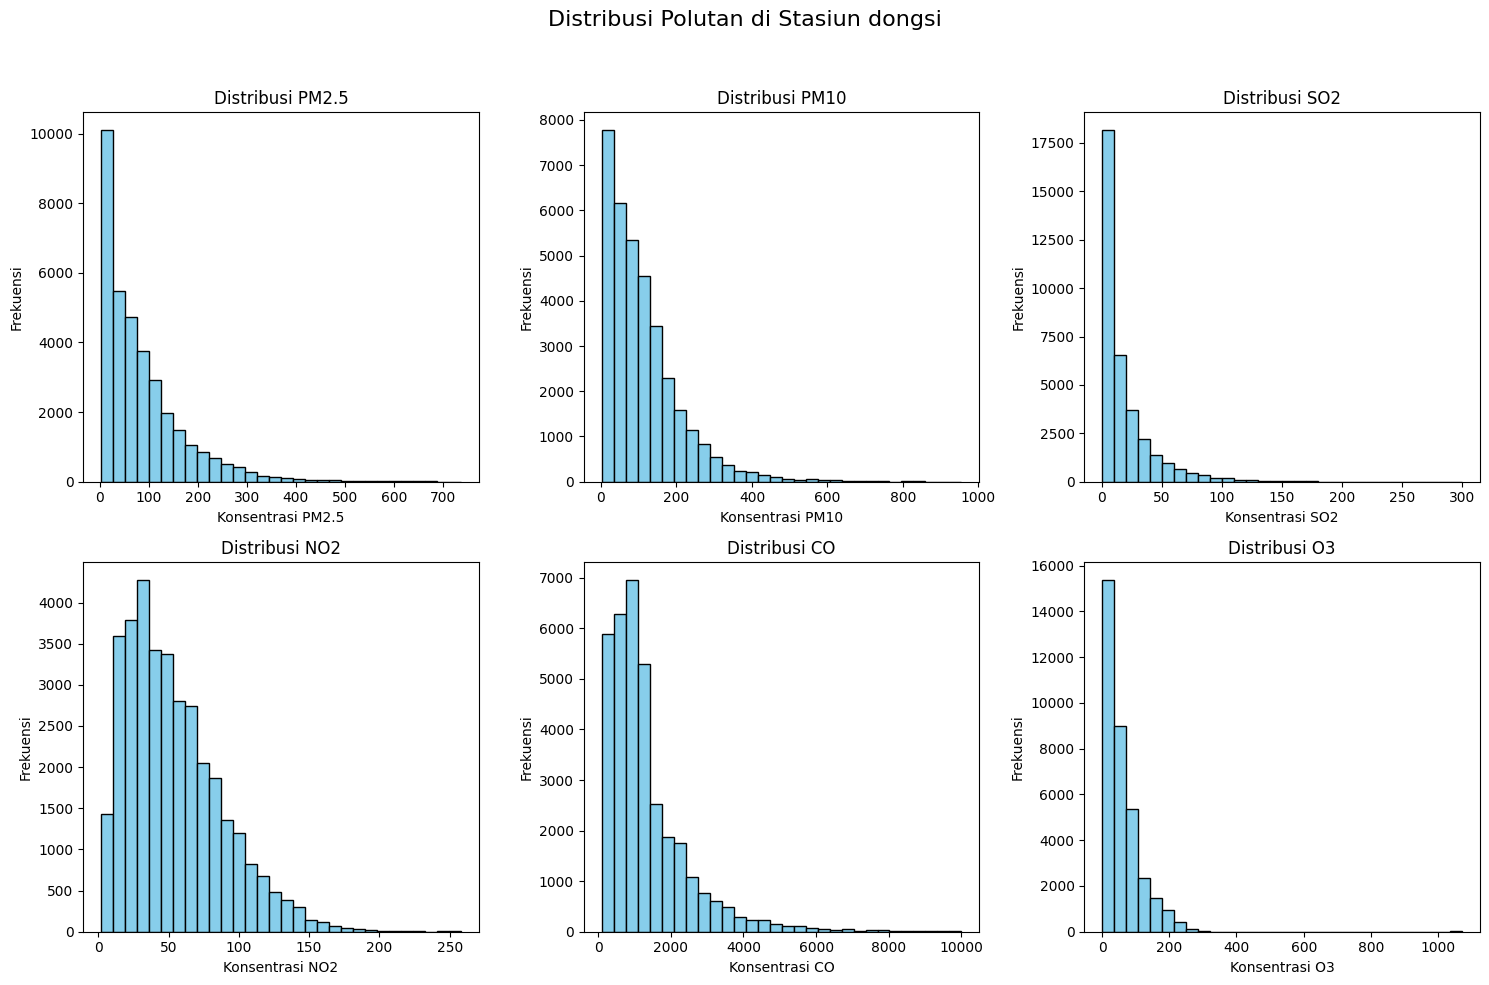

In [134]:
# Histogram untuk melihat sebaran polutan.
pollutants_dongsi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun dongsi", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_dongsi):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(dongsi_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

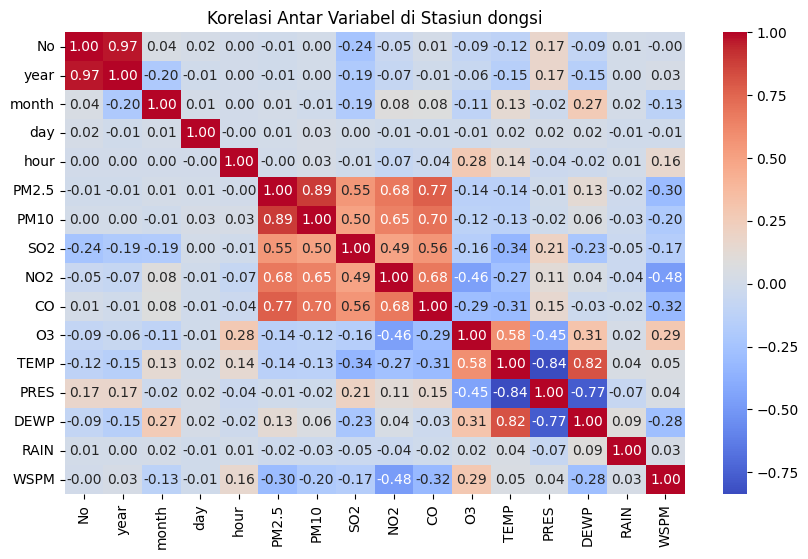

In [133]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_dongsi = dongsi_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(dongsi_df[num_cols_dongsi].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun dongsi')
plt.show()

### Explore `guanyuan_df`

In [129]:
print(guanyuan_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
8461    8462  2014      2   16    13  172.0  127.0  82.0   50.0  1600.0   
33389  33390  2016     12   21     5  399.0  408.0   9.0  134.0  8800.0   
14656  14657  2014     11    1    16   13.0   28.0   4.0   33.0   300.0   
12860  12861  2014      8   18    20   83.0   91.0   3.0   24.0   900.0   
1658    1659  2013      5    9     2   33.0   38.0  14.0   44.0   500.0   
2194    2195  2013      5   31    10  129.0  164.0  46.0   56.0   800.0   
17154  17155  2015      2   13    18  149.0  152.0  38.0   85.0  1700.0   
33765  33766  2017      1    5    21  210.0  210.0  19.0  118.0  4500.0   
3266    3267  2013      7   15     2   50.0   13.0   3.0   16.0   200.0   
29582  29583  2016      7   15    14   48.0   48.0   2.0   41.0   900.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
8461    63.0   6.5  1023.2  -9.9   0.0  SSE   1.4  Guanyuan  
33389    2.0  -1.2  1023.3  -2.6   0.0  ENE   1.7 

In [130]:
print(guanyuan_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

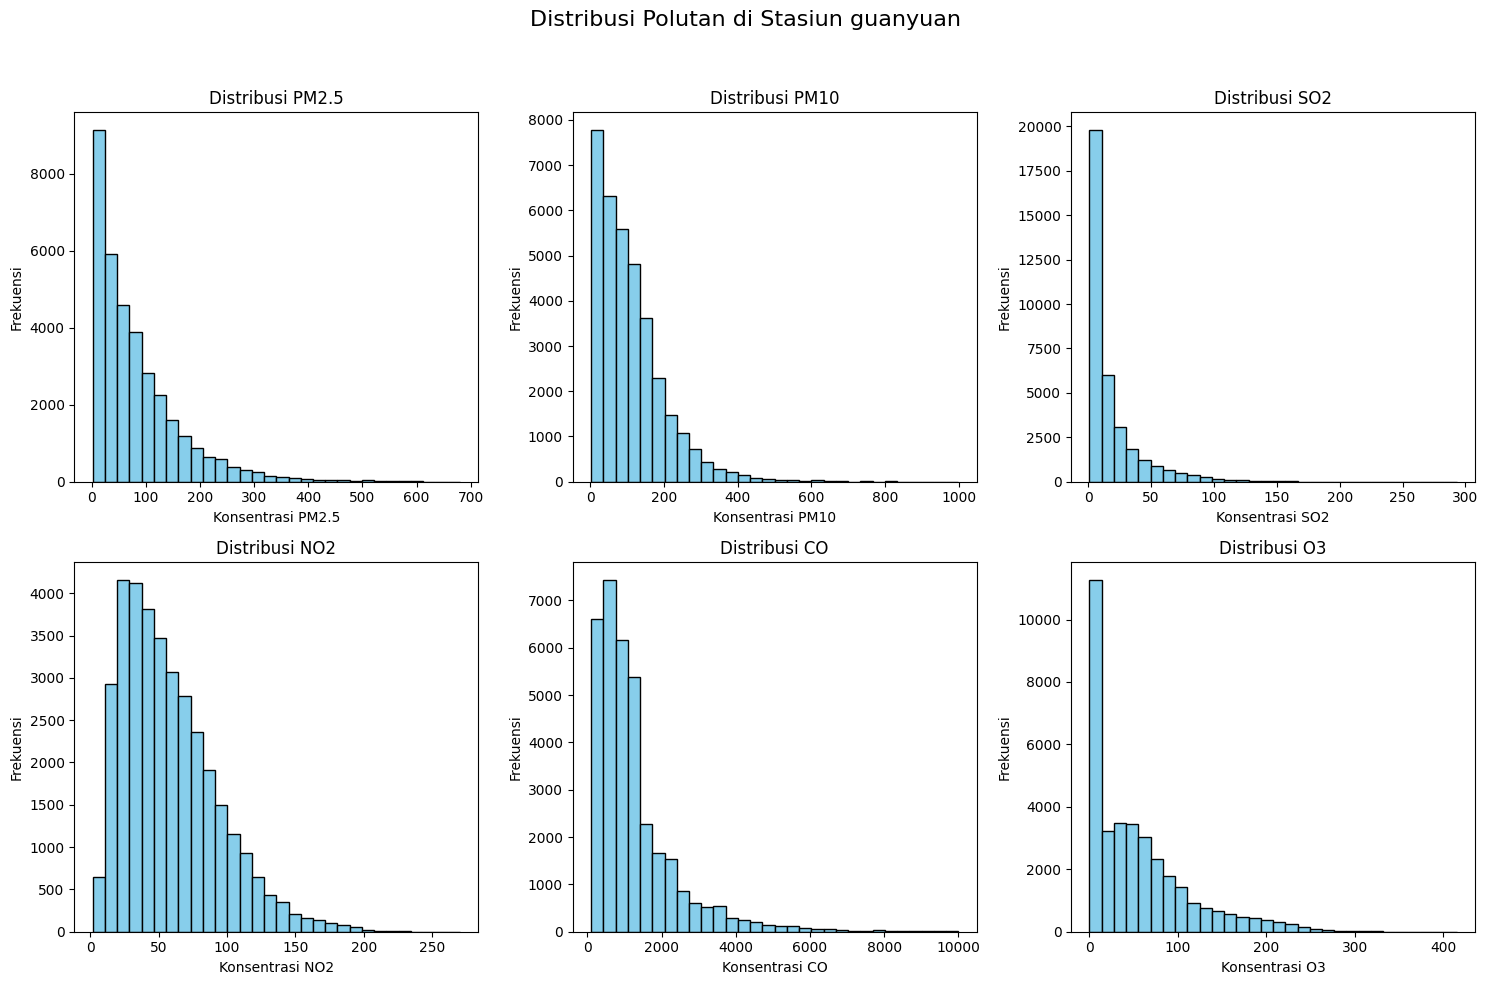

In [131]:
# Histogram untuk melihat sebaran polutan.
pollutants_guanyuan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun guanyuan", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_guanyuan):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(guanyuan_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

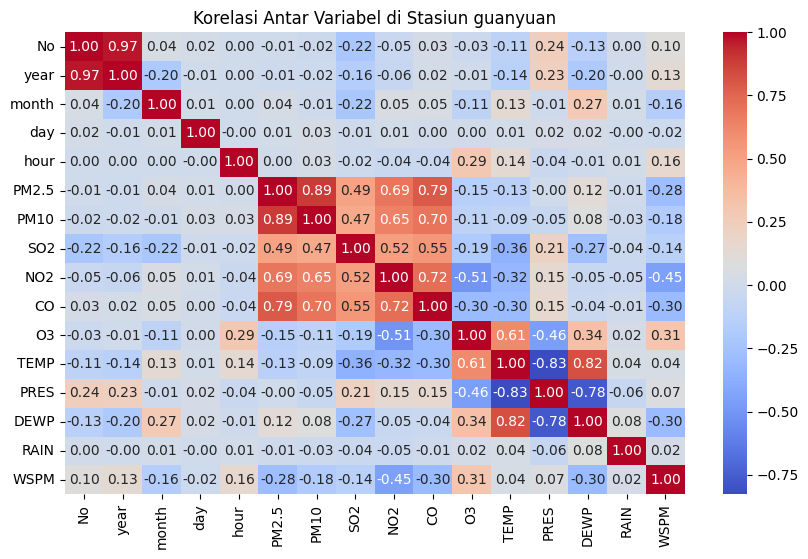

In [132]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_guanyuan = guanyuan_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(guanyuan_df[num_cols_guanyuan].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun guanyuan')
plt.show()

### Explore `gucheng_df`

In [125]:
print(gucheng_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
19535  19536  2015      5   23    23  129.0  231.0  16.0   76.0  1200.0   
26859  26860  2016      3   24     3    4.0    5.0   3.0   13.0   300.0   
13589  13590  2014      9   18     5   37.0   37.0   2.0   37.0   600.0   
8890    8891  2014      3    6    10    9.0   13.0  24.0   31.0  2800.0   
28215  28216  2016      5   19    15   85.0   87.0  16.0   17.0   700.0   
7604    7605  2014      1   11    20  219.0  269.0  89.0  166.0  4300.0   
7964    7965  2014      1   26    20  154.0  168.0  95.0   73.0  1900.0   
34307  34308  2017      1   28    11  306.0  391.0  96.0   65.0   200.0   
33270  33271  2016     12   16     6   57.0   66.0  25.0   71.0  2700.0   
31439  31440  2016      9   30    23  153.0  218.0   2.0  141.0  1500.0   

          O3   TEMP    PRES  DEWP  RAIN  wd  WSPM  station  
19535   70.0  22.80  1000.0  14.1   0.0   W   0.4  Gucheng  
26859   74.0   6.80  1026.3 -14.1   0.0   N   3.5  G

In [126]:
print(gucheng_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

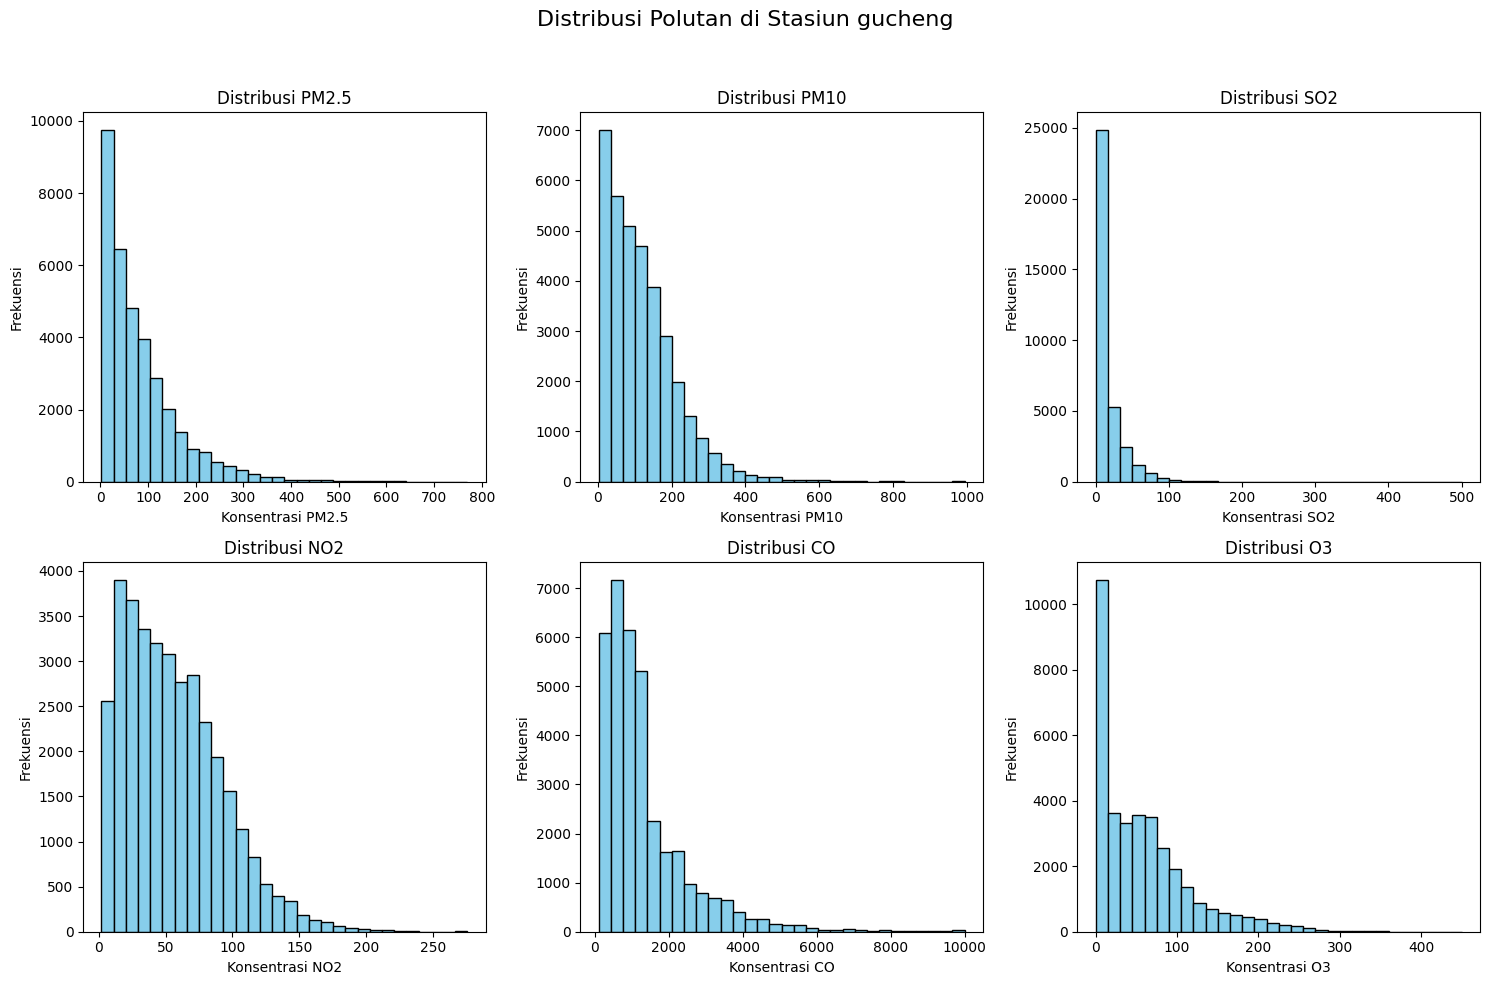

In [127]:
# Histogram untuk melihat sebaran polutan.
pollutants_gucheng = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun gucheng", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_gucheng):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(gucheng_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

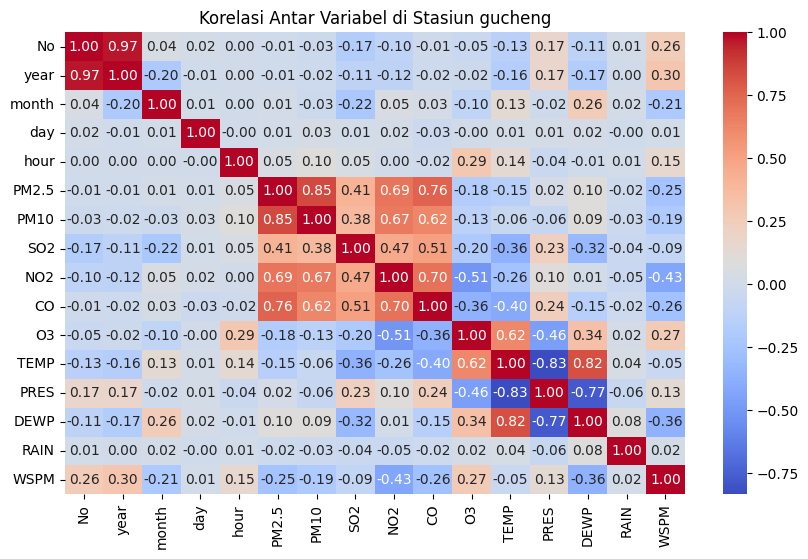

In [128]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_gucheng = gucheng_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(gucheng_df[num_cols_gucheng].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun gucheng')
plt.show()

### Explore `huairou_df`

In [121]:
print(huairou_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO  \
20213  20214  2015      6   21     5   24.0   35.0   3.0   9.0   400.0   
16466  16467  2015      1   16     2  350.0  350.0   5.0  78.0  3400.0   
15817  15818  2014     12   20     1    7.0    7.0   2.0   2.0   200.0   
24087  24088  2015     11   29    15  142.0  142.0  27.0  46.0  2000.0   
9652    9653  2014      4    7     4   60.0  114.0   7.0  26.0   600.0   
3892    3893  2013      8   10     4   33.0   41.0   3.0  13.0   500.0   
32006  32007  2016     10   24    14   69.0  115.0   6.0  55.0   800.0   
5814    5815  2013     10   29     6   38.0   38.0   2.0  24.0   800.0   
22689  22690  2015     10    2     9   22.0   70.0   4.0  24.0   500.0   
13592  13593  2014      9   18     8   70.0   70.0   2.0  33.0   700.0   

             O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
20213  143.0000  18.0  1001.1  15.8   0.0   NW   1.2  Huairou  
16466    2.0000  -8.0  1016.0  -9.4   0.0   NW   0.8  Hua

In [122]:
print(huairou_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

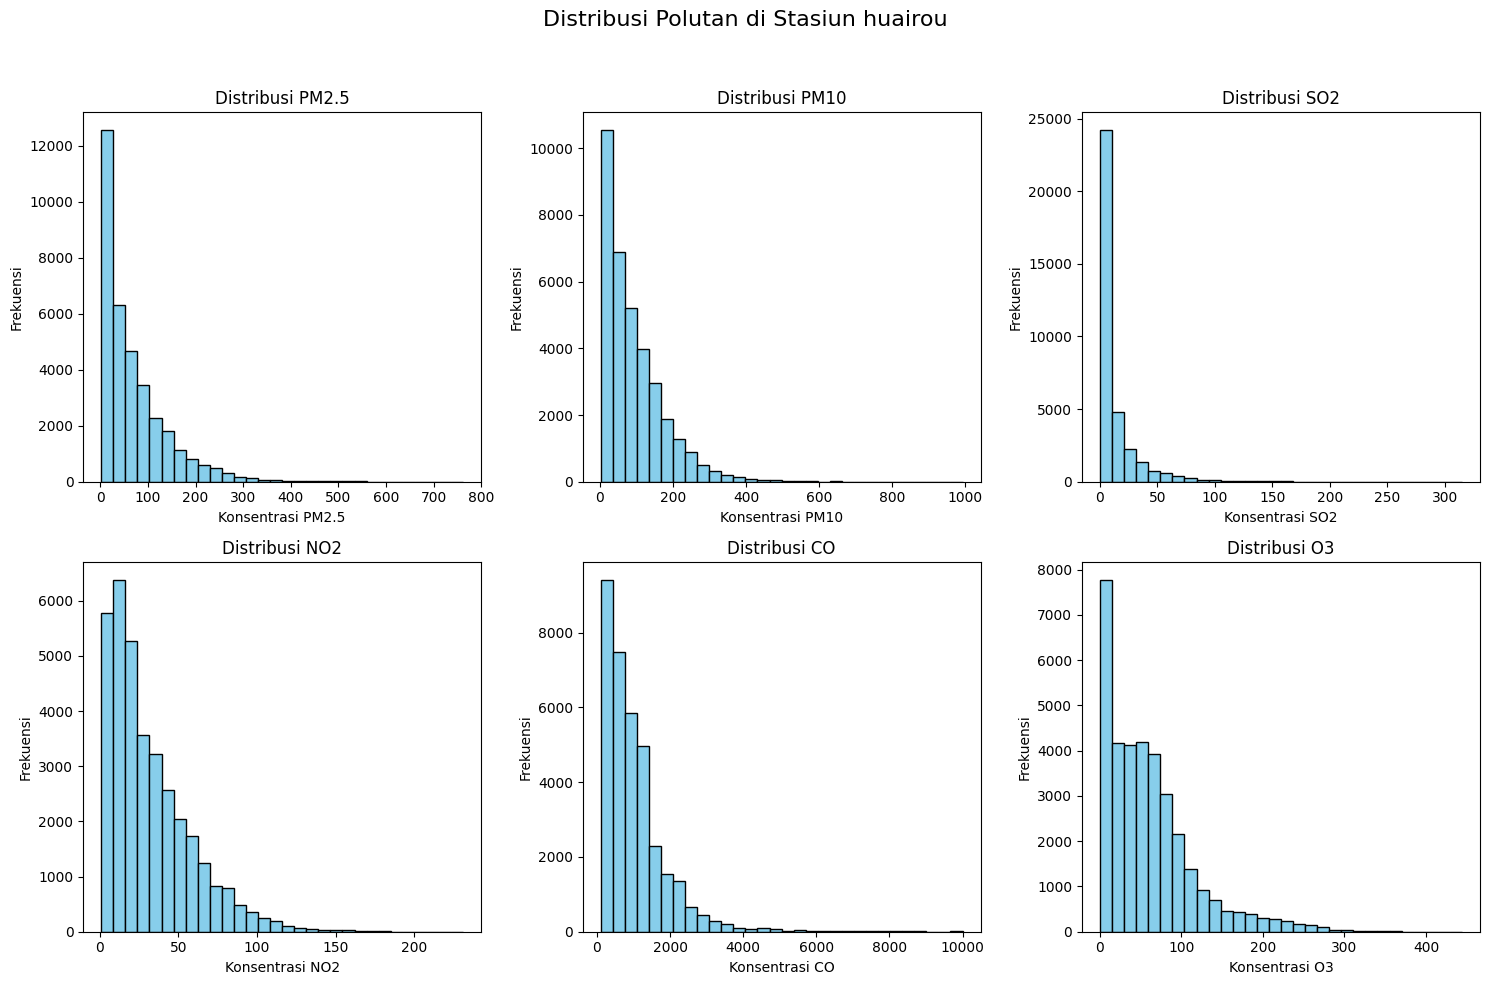

In [123]:
# Histogram untuk melihat sebaran polutan.
pollutants_huairou = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun huairou", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_huairou):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(huairou_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

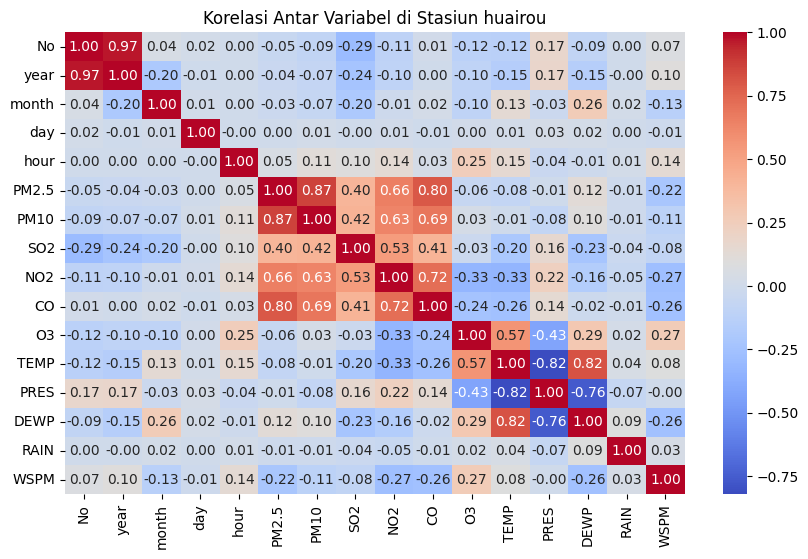

In [124]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_huairou = huairou_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(huairou_df[num_cols_huairou].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun huairou')
plt.show()

### Explore `nongzhanguan_df`

In [117]:
print(nongzhanguan_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
12404  12405  2014      7   30    20  157.0  181.0    4.0   41.0  2100.0   
9013    9014  2014      3   11    13   37.0   37.0  147.0   91.0  2500.0   
34908  34909  2017      2   22    12  128.0  128.0   16.0   43.0  1400.0   
30931  30932  2016      9    9    19   12.0   18.0    4.0   47.0   500.0   
17943  17944  2015      3   18    15   43.0   62.0   10.0   37.0   500.0   
3357    3358  2013      7   18    21  106.0   94.0   10.0    8.0  1100.0   
18946  18947  2015      4   29    10  154.0  180.0   19.0  107.0  2200.0   
34186  34187  2017      1   23    10    9.0    9.0    9.0   29.0   700.0   
17529  17530  2015      3    1     9   74.0  131.0   23.0   65.0  1300.0   
27453  27454  2016      4   17    21   10.0   35.0    2.0   32.0   300.0   

          O3    TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
12404  115.0  25.100  1002.7  22.6   0.0  ESE   1.3  Nongzhanguan  
9013    55.0  11.900  1011.

In [118]:
print(nongzhanguan_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

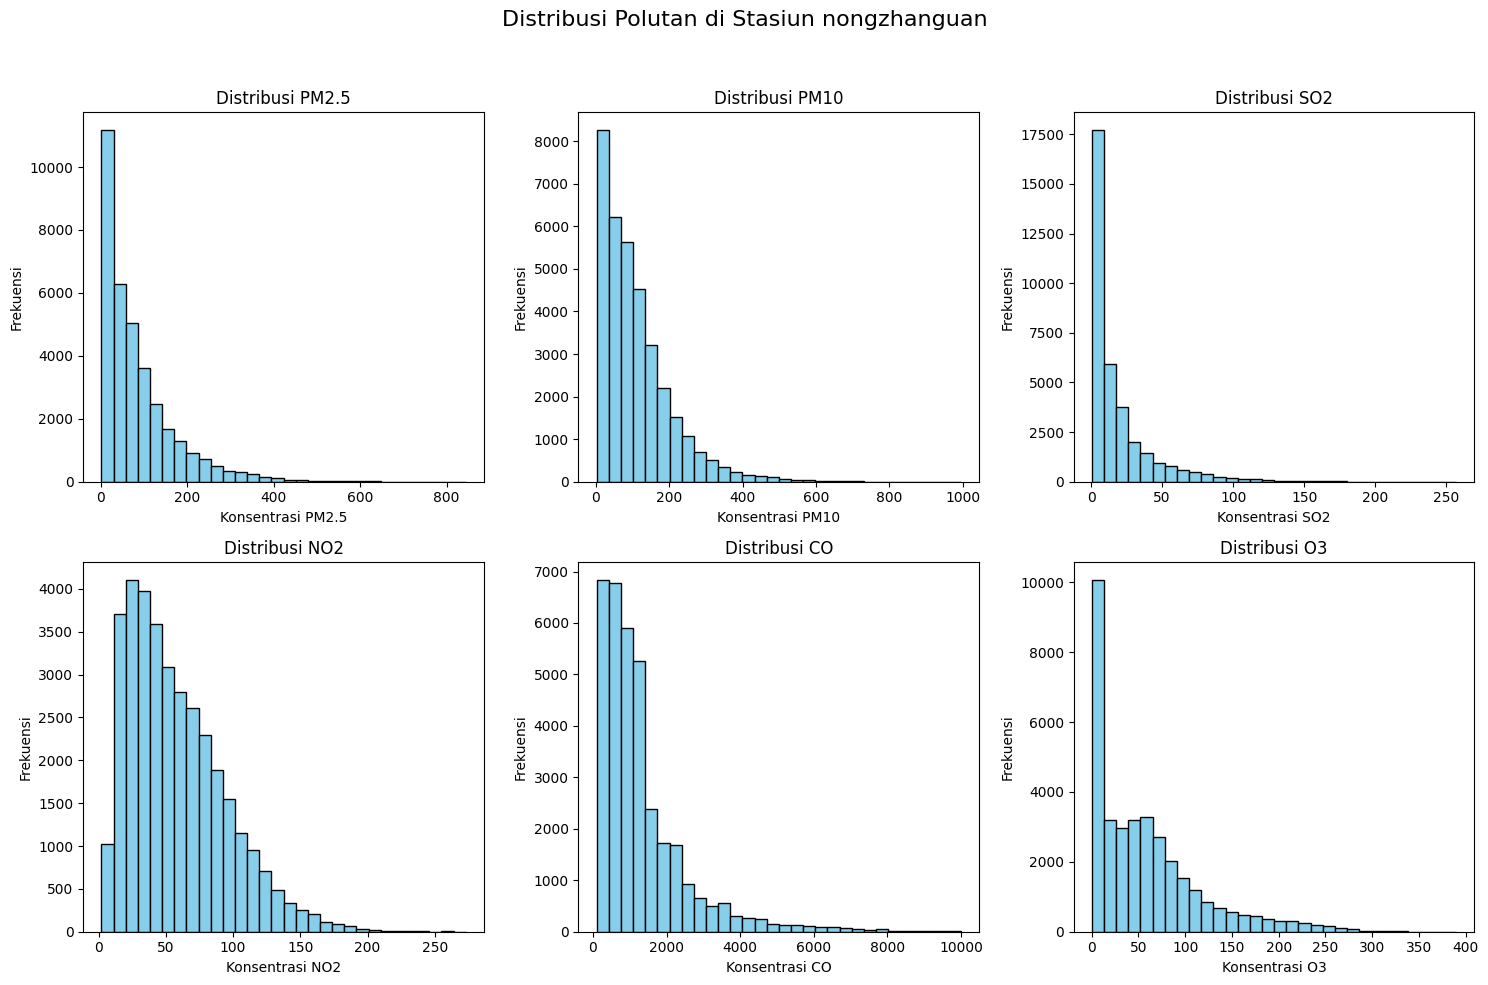

In [120]:
# Histogram untuk melihat sebaran polutan.
pollutants_nongzhanguan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun nongzhanguan", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_nongzhanguan):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(nongzhanguan_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

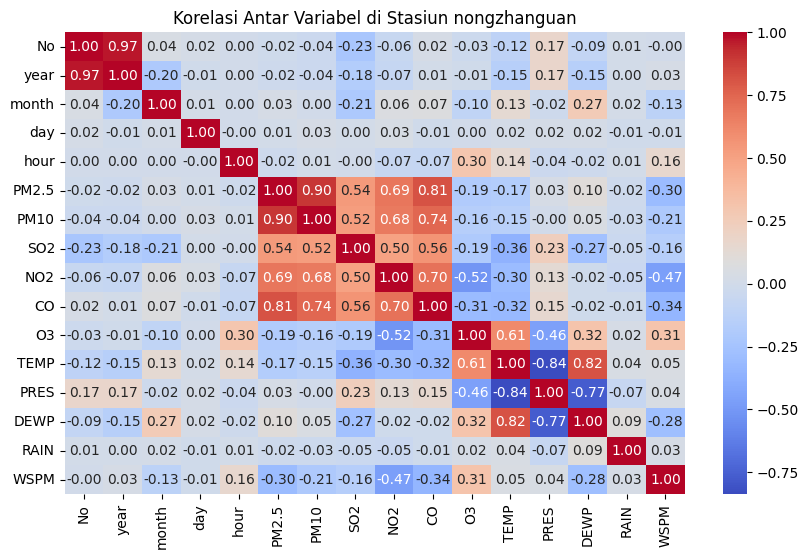

In [119]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_nongzhanguan = nongzhanguan_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(nongzhanguan_df[num_cols_nongzhanguan].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun nongzhanguan')
plt.show()

### Explore `shunyi_df`

In [113]:
print(shunyi_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10        SO2    NO2      CO  \
28993  28994  2016      6   21     1   67.0   67.0   2.000000   16.0   700.0   
8241    8242  2014      2    7     9   75.0   55.0  19.000000   27.0  1300.0   
9832    9833  2014      4   14    16  209.0  246.0  37.000000   60.0  1700.0   
14375  14376  2014     10   20    23  102.0  102.0   5.000000   57.0  1400.0   
27205  27206  2016      4    7    13    3.0   33.0   2.000000   12.0   200.0   
34883  34884  2017      2   21    11  121.0  153.5  48.000000   88.0  2600.0   
24907  24908  2016      1    2    19  442.0  442.0  24.000000  171.0  6500.0   
30673  30674  2016      8   30     1   39.0   72.0   6.727273   59.0  1000.0   
4990    4991  2013      9   24    22   27.0   64.0   1.000000   42.0   500.0   
9962    9963  2014      4   20     2   65.0   74.0   3.000000   65.0   900.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
28993  114.0  24.3   998.9  21.0   0.0    N   1.2  Shunyi  

In [114]:
print(shunyi_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

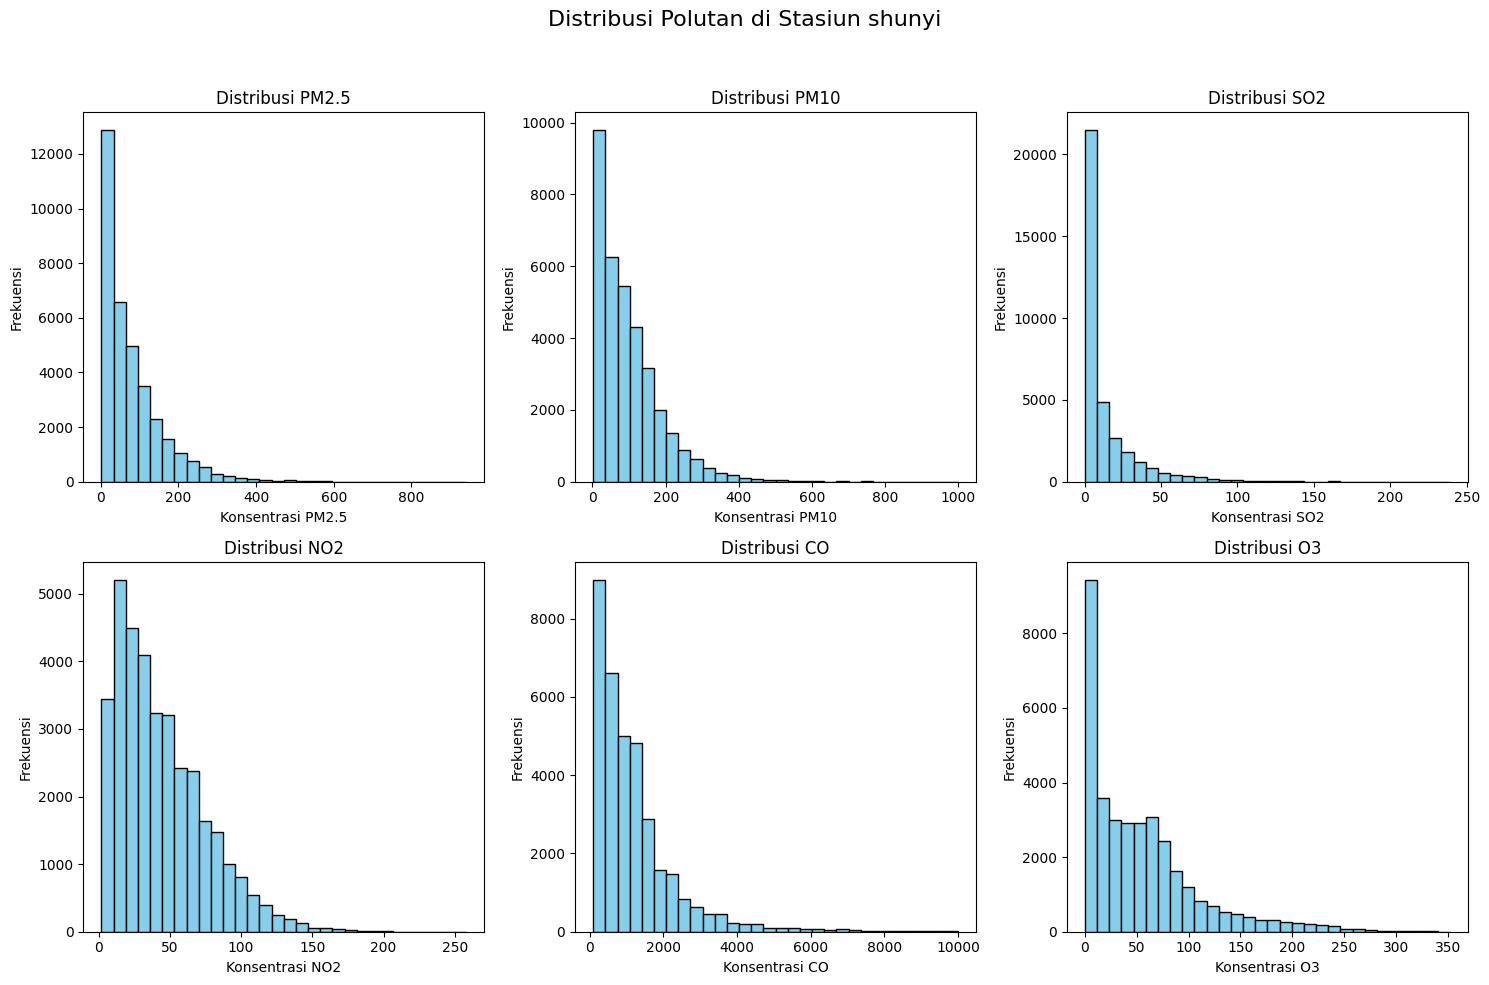

In [115]:
# Histogram untuk melihat sebaran polutan.
pollutants_shunyi = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun shunyi", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_shunyi):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(shunyi_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

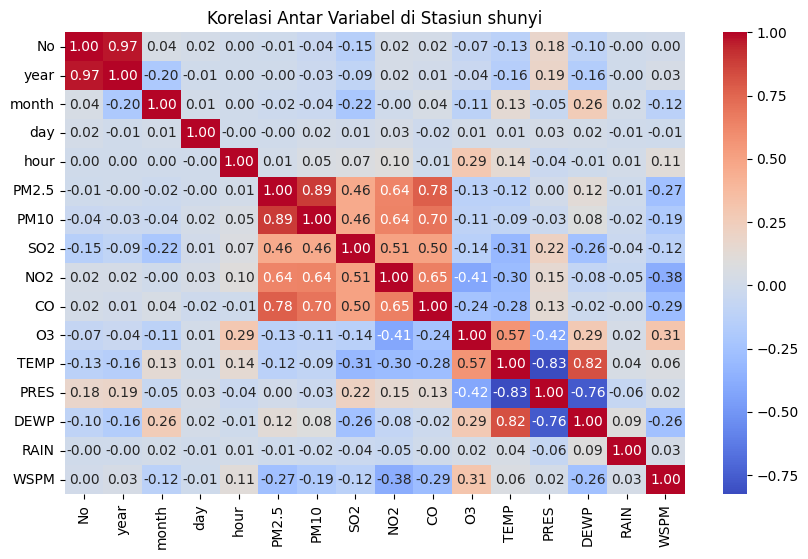

In [116]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_shunyi = shunyi_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(shunyi_df[num_cols_shunyi].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun shunyi')
plt.show()

### Explore `tiantan_df`

In [109]:
print(tiantan_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO  \
17286  17287  2015      2   19     6  347.0  394.0  83.0   57.0  1900.0   
16644  16645  2015      1   23    12  203.0  203.0  72.0  120.0  2900.0   
8057    8058  2014      1   30    17   23.0   72.0  16.0   30.0   500.0   
8429    8430  2014      2   15     5  395.0  380.0  72.0  111.0  4100.0   
9686    9687  2014      4    8    14  157.0  176.0  55.0   36.0  1200.0   
15237  15238  2014     11   25    21  247.0  282.0   2.0   93.0  3100.0   
6120    6121  2013     11   11     0   24.0  106.0  13.0   47.0   600.0   
5937    5938  2013     11    3     9   10.0   13.0  13.0   50.0   700.0   
25229  25230  2016      1   16     5   98.0  100.0  35.0   74.0  3200.0   
16968  16969  2015      2    6     0   78.0   80.0  27.0   93.0  1500.0   

             O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
17286   11.0000  -1.0  1028.0 -11.5   0.0   SE   2.0  Tiantan  
16644   16.0000   1.0  1013.0 -11.4   0.0  ENE

In [110]:
print(tiantan_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

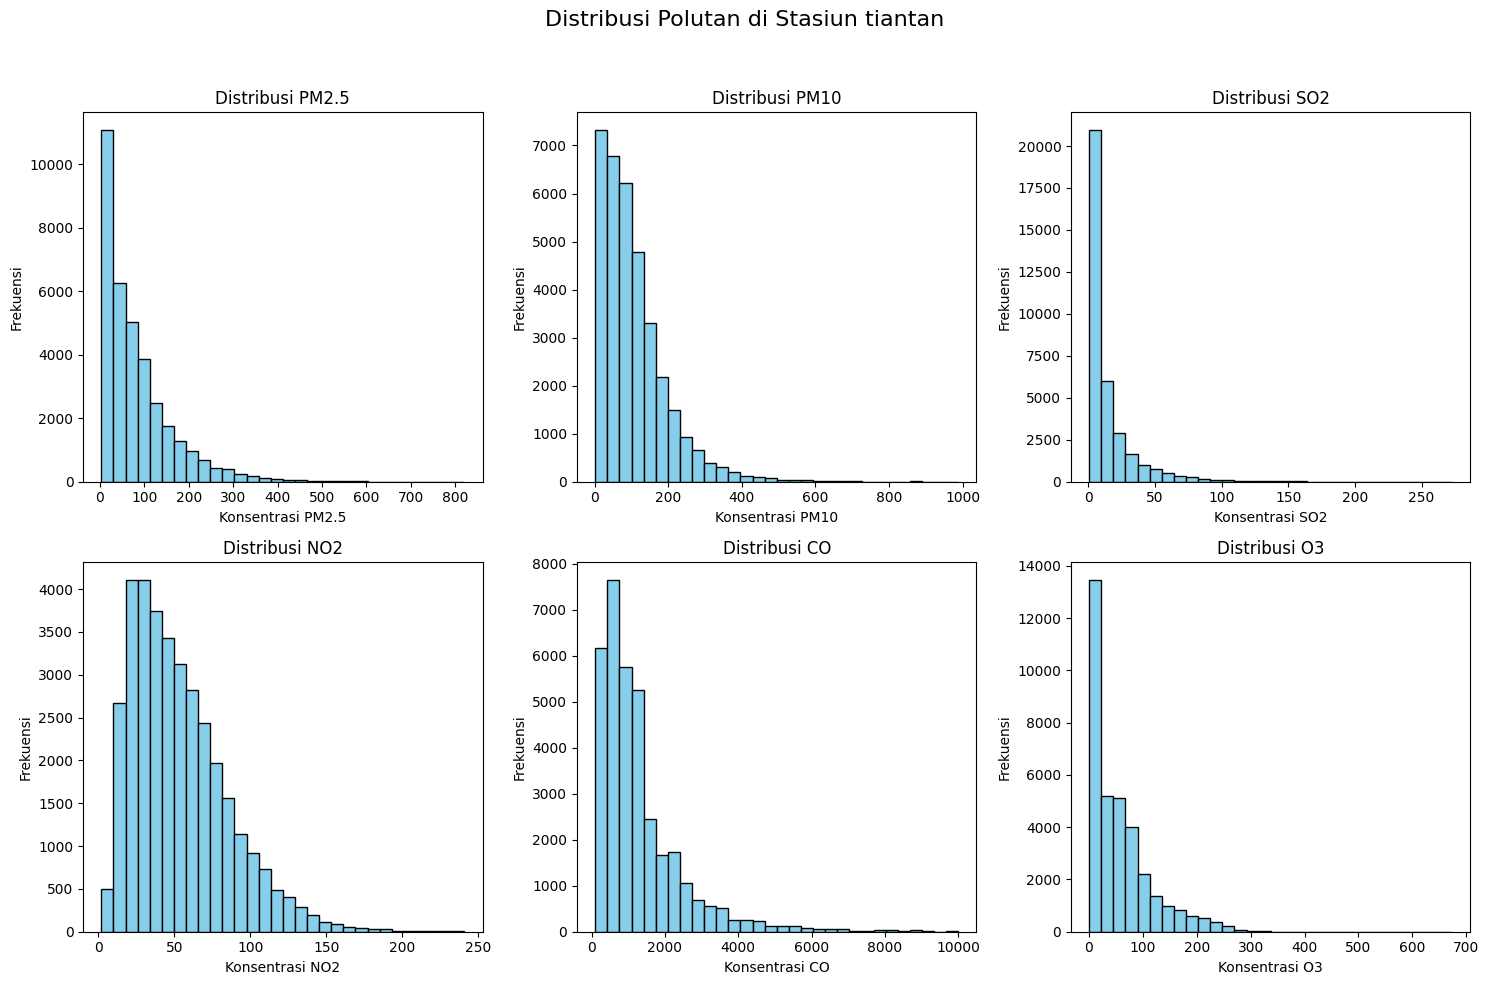

In [111]:
# Histogram untuk melihat sebaran polutan.
pollutants_tiantan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun tiantan", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_tiantan):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(tiantan_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

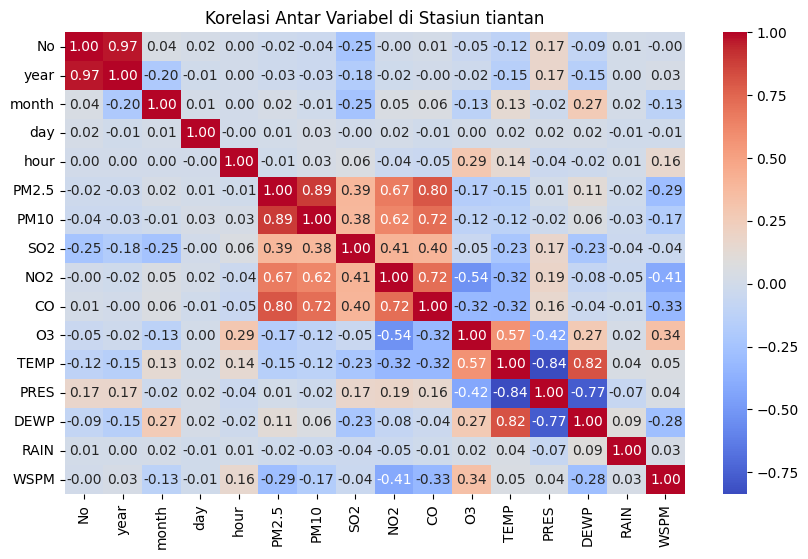

In [112]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_tiantan = tiantan_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(tiantan_df[num_cols_tiantan].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun tiantan')
plt.show()

### Explore `wanliu_df`

In [105]:
print(wanliu_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour  PM2.5   PM10      SO2       NO2  \
31705  31706  2016     10   12     1   41.0   44.0   2.0000   53.0000   
2411    2412  2013      6    9    11   11.0   11.0   6.2832   38.8017   
33015  33016  2016     12    5    15    3.0   17.0   2.0000    8.0000   
20116  20117  2015      6   17     4   53.0   58.0   4.0000   36.0000   
2522    2523  2013      6   14     2   86.0   87.0  36.8424   60.3582   
31583  31584  2016     10    6    23   44.0   44.0   2.0000   32.0000   
29379  29380  2016      7    7     3   81.0   91.0   6.0000   44.0000   
21332  21333  2015      8    6    20   87.0  112.0   2.0000   32.0000   
26637  26638  2016      3   14    21   51.0  102.0  27.0000   90.0000   
33385  33386  2016     12   21     1  391.0  391.0   8.0000  145.0000   

                CO        O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
31705   800.000000   17.0000  13.8  1019.7   8.6   0.0  NNE   0.4  Wanliu  
2411    466.666667   35.5572  17.2  1006.4  

In [106]:
print(wanliu_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

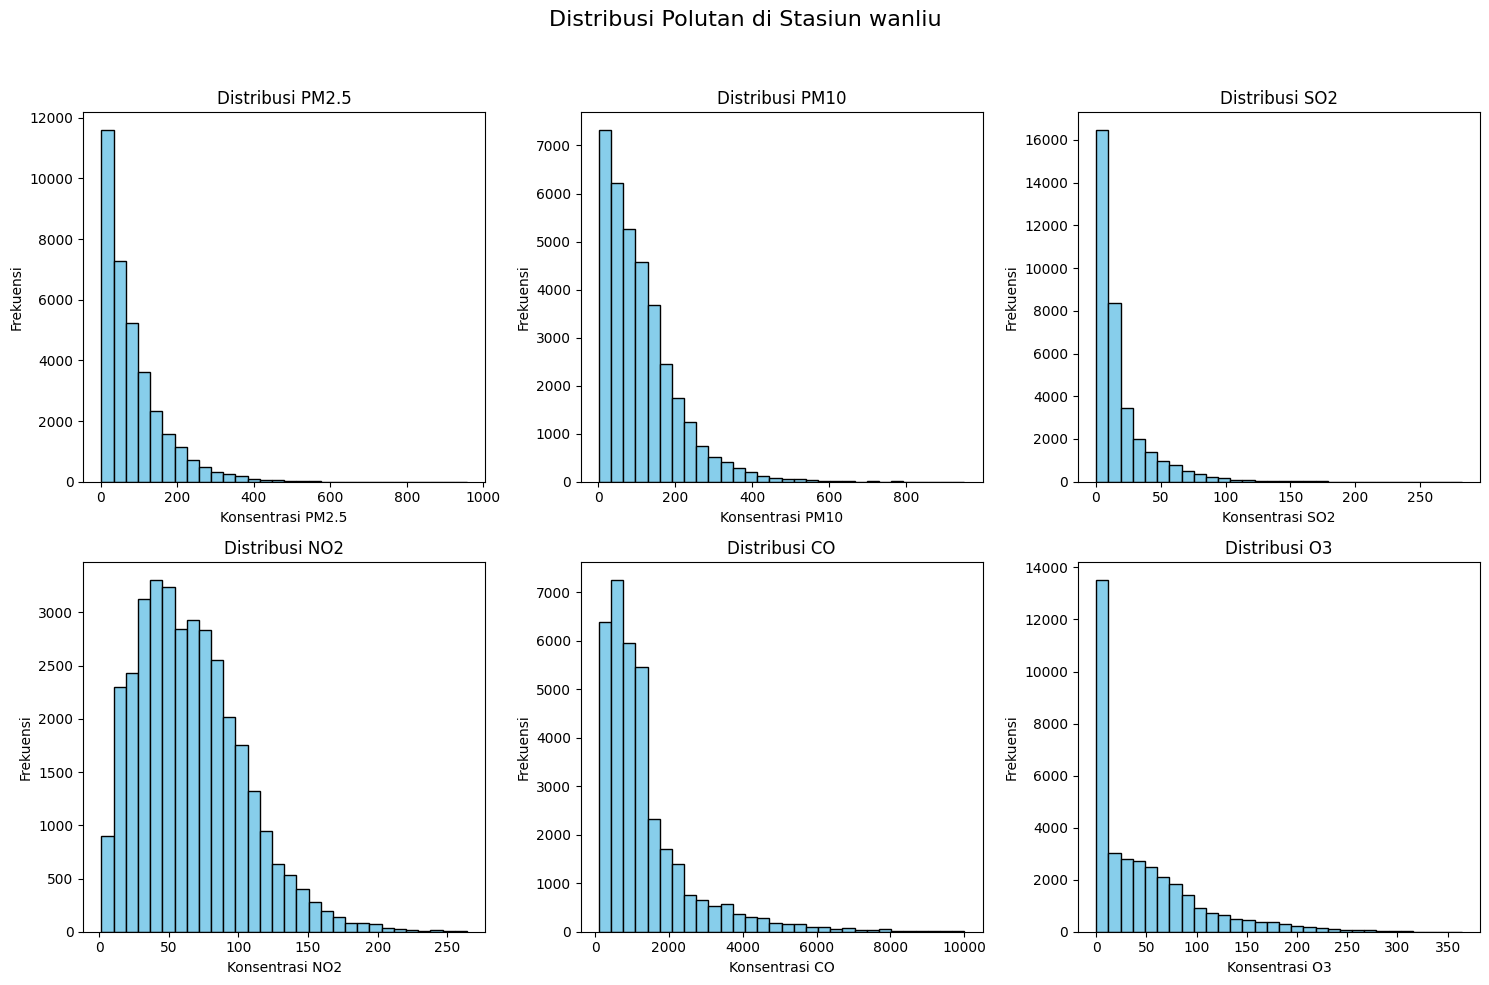

In [107]:
# Histogram untuk melihat sebaran polutan.
pollutants_wanliu = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun wanliu", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_wanliu):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(wanliu_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

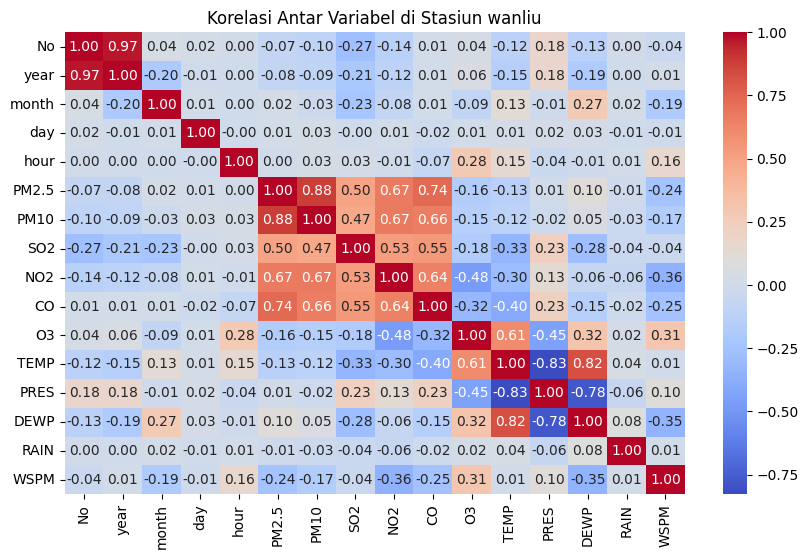

In [108]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_wanliu = wanliu_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(wanliu_df[num_cols_wanliu].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun wanliu')
plt.show()

### Explore `wanshouxigong_df`

In [97]:
print(wanshouxigong_df.sample(10))  # Tampilkan 10 sampel acak

          No  year  month  day  hour       PM2.5        PM10        SO2  \
34876  34877  2017      2   21     4   76.333333   93.333333  24.666667   
30441  30442  2016      8   20     9   73.000000   73.000000   2.000000   
12305  12306  2014      7   26    17   81.000000  154.000000  26.000000   
28369  28370  2016      5   26     1   15.000000   76.000000   3.000000   
25995  25996  2016      2   17     3   10.000000   13.000000   7.000000   
11463  11464  2014      6   21    15   59.000000   59.000000   3.000000   
16251  16252  2015      1    7     3  106.000000  120.000000  50.000000   
3589    3590  2013      7   28    13   30.000000   14.000000   7.000000   
25854  25855  2016      2   11     6  170.000000  173.000000  79.000000   
5014    5015  2013      9   25    22   10.000000   84.000000   5.000000   

             NO2           CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
34876  76.666667   566.666667    2.0  -1.2  1029.4 -18.3   0.0   SW   0.1   
30441  69.000000  14

In [98]:
print(wanshouxigong_df.describe(include='all'))  # Statistik untuk semua tipe data

                  No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10     

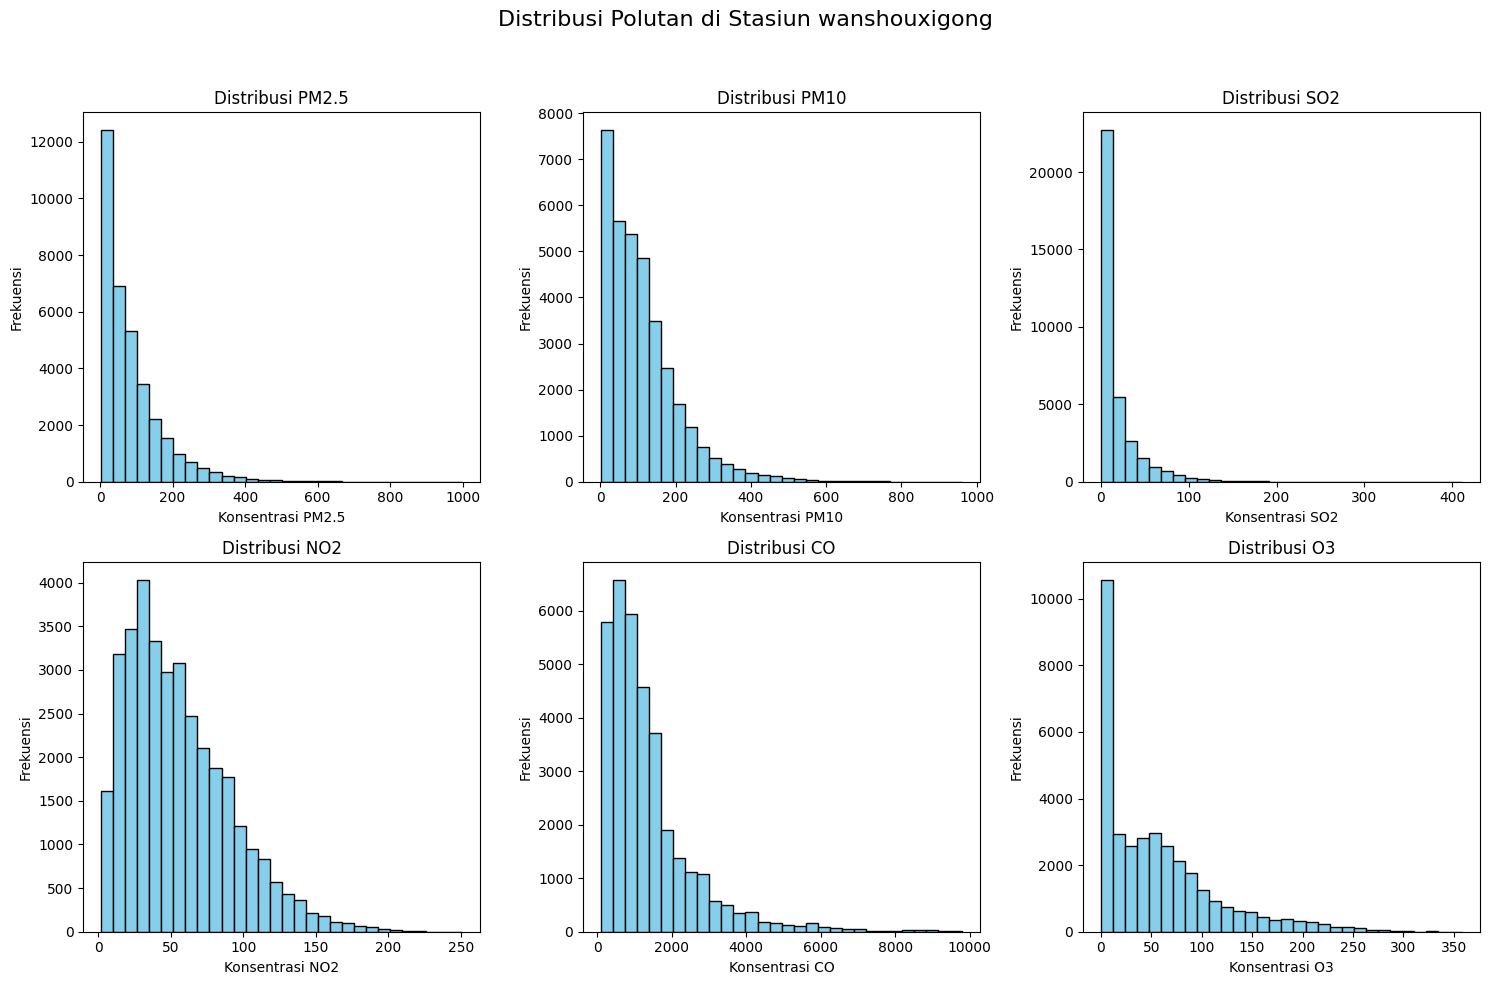

In [99]:
# Histogram untuk melihat sebaran polutan.
pollutants_wanshouxigong = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Buat histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Distribusi Polutan di Stasiun wanshouxigong", fontsize=16)

# Looping untuk setiap polutan
for i, col in enumerate(pollutants_wanshouxigong):
    ax = axes[i // 3, i % 3]  # Atur posisi subplot
    ax.hist(wanshouxigong_df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel(f'Konsentrasi {col}')  # X-axis menunjukkan konsentrasi polutan
    ax.set_ylabel('Frekuensi')  # Y-axis menunjukkan jumlah kejadian

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

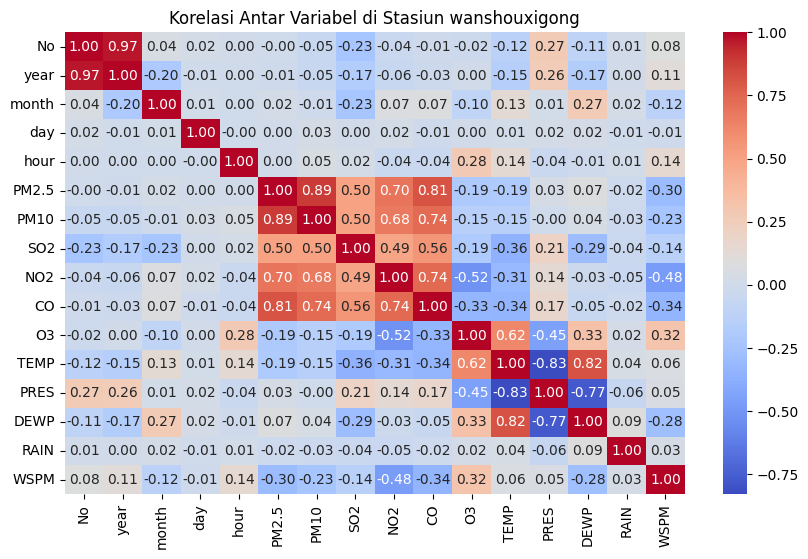

In [100]:
# Pilih hanya kolom numerik (exclude "wd" dan "station" karena bertipe string)
num_cols_wanshouxigong = wanshouxigong_df.select_dtypes(include=['float64', 'int64']).columns

# Plot heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(wanshouxigong_df[num_cols_wanshouxigong].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel di Stasiun wanshouxigong')
plt.show()

### Explore all data

Menggabungkan semua tabel dan membuat file `.csv` baru yang berisi semua tabel

In [142]:
# List nama semua stasiun
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 
            'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

# Gabungkan semua dataframe
all_data = pd.concat([eval(f"{station.lower()}_df") for station in stations], ignore_index=True)

# Hapus kolom 'No'
all_data.drop(columns=['No'], inplace=True)

# Urutkan berdasarkan tahun, bulan, hari, dan jam
all_data = all_data.sort_values(by=['year', 'month', 'day', 'hour']).reset_index(drop=True)

# Simpan ke file CSV baru
all_data.to_csv("merged_air_quality.csv", index=False)

In [143]:
# Cek struktur data
print(all_data.info())
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       420768 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB
None
   year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  

In [144]:
print("Jumlah baris setelah merge:", all_data.shape[0])
print("Jumlah kolom setelah merge:", all_data.shape[1])

Jumlah baris setelah merge: 420768
Jumlah kolom setelah merge: 17


In [145]:
print(all_data.sample(5))

        year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
173042  2014     10   22    20  117.0  145.0   4.0000  90.0000  1300.0   
214220  2015      3   14    19  101.0  127.0  41.0000  73.0000  1300.0   
327692  2016      4   11    19   47.0  100.0   8.0000  31.0000   500.0   
63758   2013     10    8     9   30.0   30.0   2.5704  15.1922  1500.0   
284072  2015     11   12     8   97.0   97.0   2.0000  45.0000  1800.0   

             O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
173042   2.0000  11.8  1011.4   6.1   0.0  WSW   1.0  Dingling  
214220  39.0000   8.1  1013.0  -7.6   0.0    E   1.1    Shunyi  
327692  91.0000  12.1  1008.3  -4.5   0.0   SE   3.2    Shunyi  
63758    1.9278  17.8  1013.8  10.7   0.0  SSE   1.8  Dingling  
284072   2.0000   5.9  1028.1   4.2   0.0    N   0.8    Shunyi  


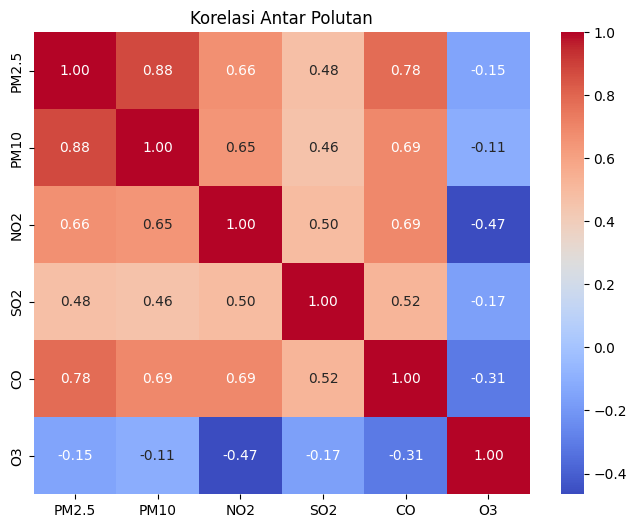

In [151]:
plt.figure(figsize=(8,6))
sns.heatmap(all_data[["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Polutan")
plt.show()

### **Insight:**
- EDA pada masing-masing tabel membantu memahami distribusi data sebelum melakukan merge.
- Mengetahui sebaran polutan dan korelasi antar variabel (merah = korelasi positig; biru = korleasi negatif).

## Visualization & Explanatory Analysis

###  Bagaimana tren polusi udara dari waktu ke waktu di setiap stasiun?

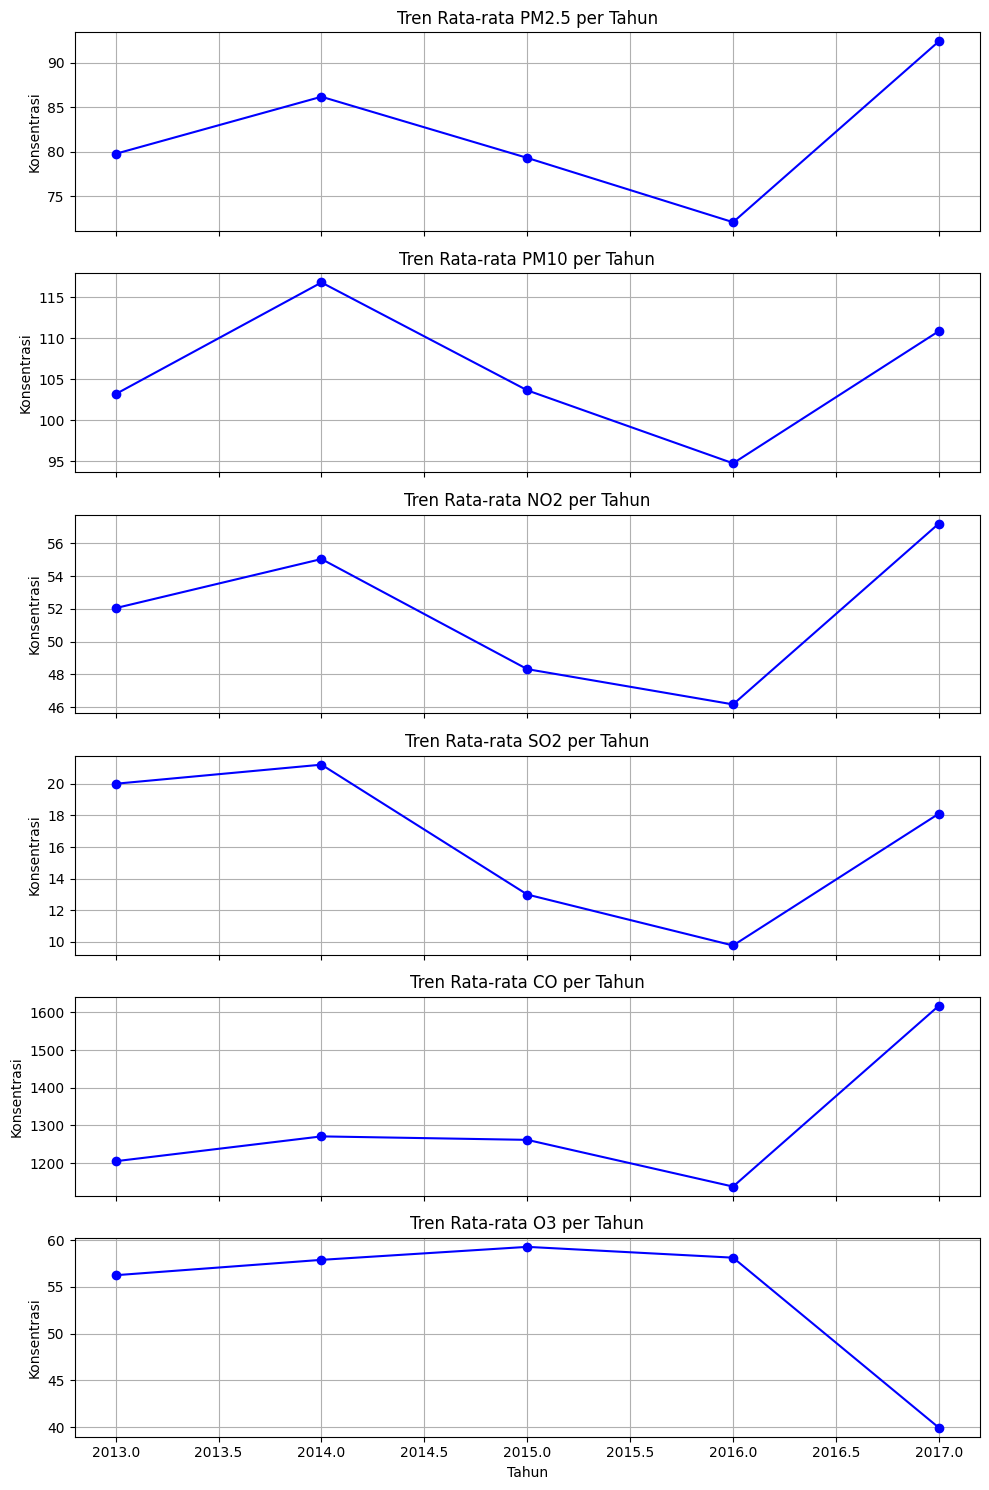

In [148]:
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=True)

for i, pollutant in enumerate(pollutants):
    axes[i].plot(all_data.groupby('year')[pollutant].mean(), marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Tren Rata-rata {pollutant} per Tahun')
    axes[i].set_ylabel('Konsentrasi')
    axes[i].grid(True)

axes[-1].set_xlabel('Tahun')
plt.tight_layout()
plt.show()

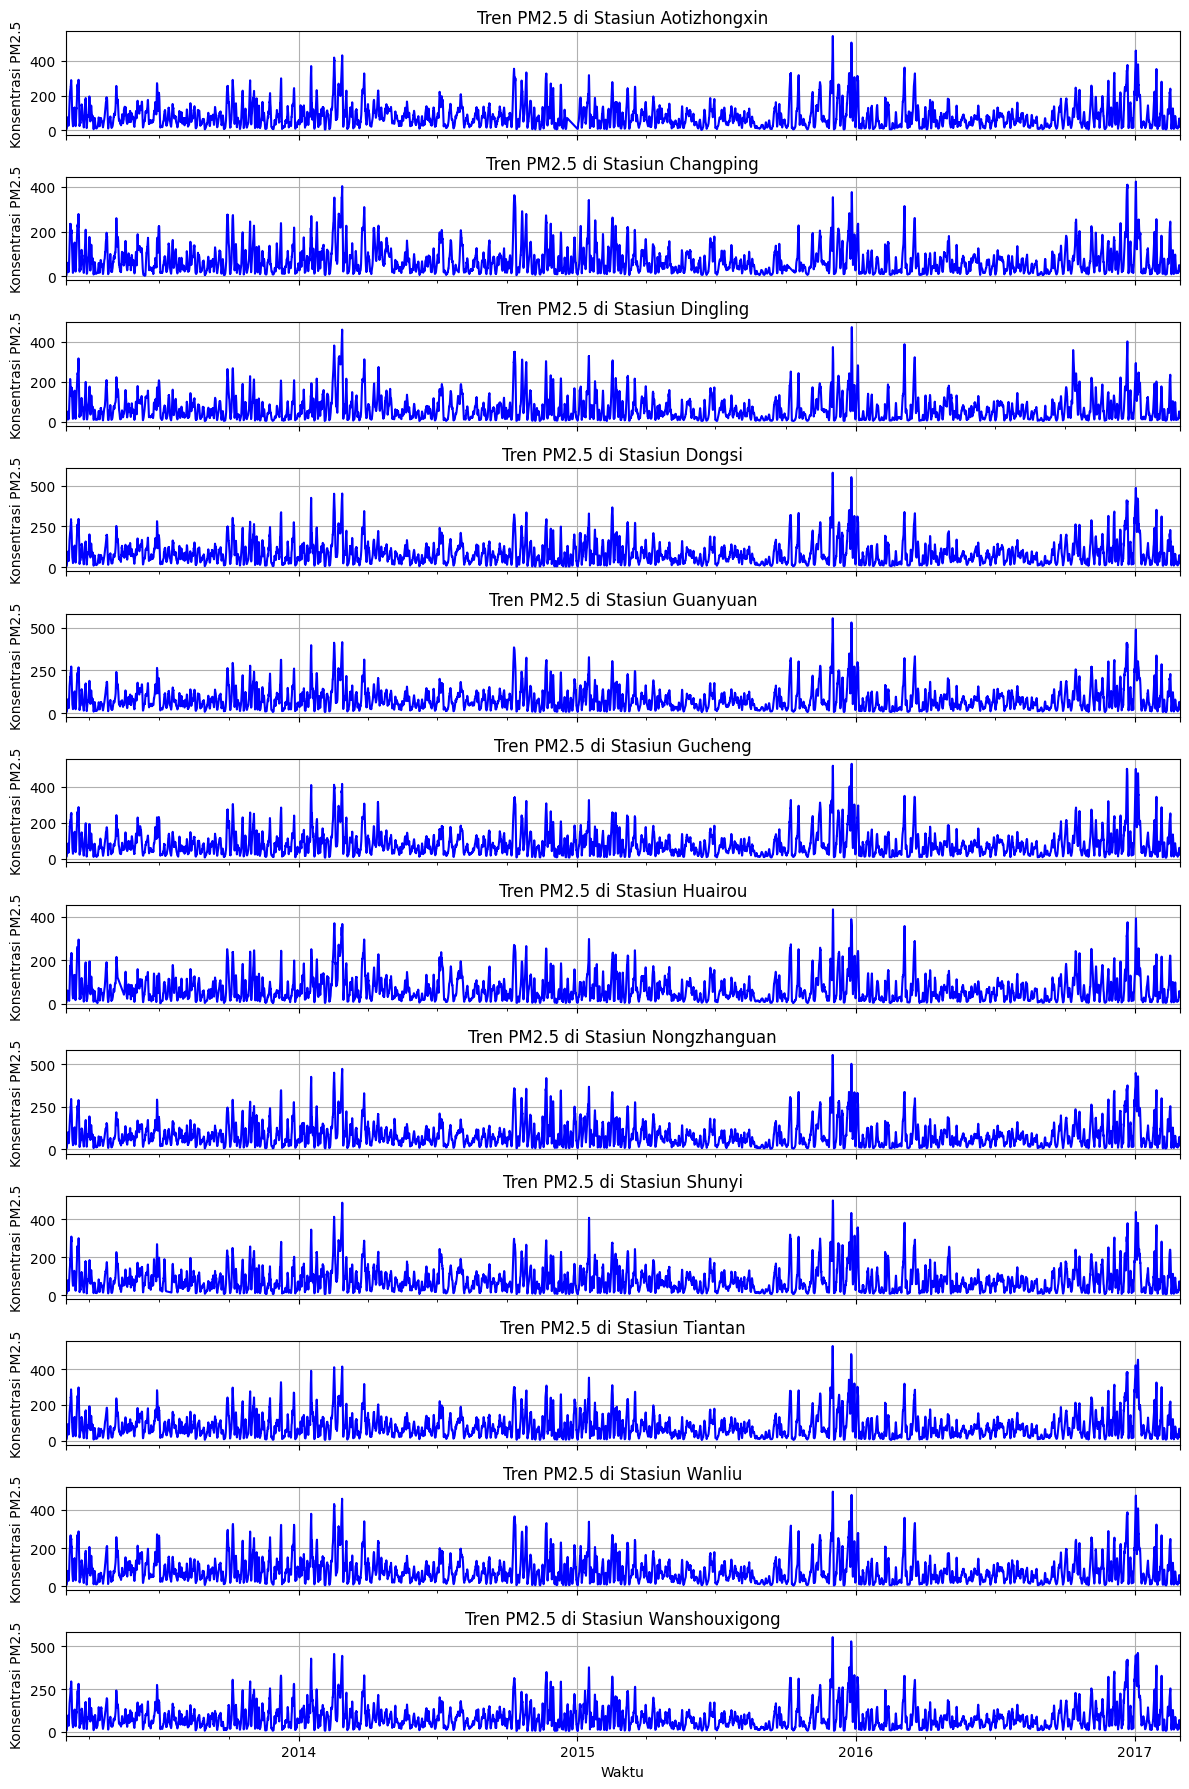

In [149]:
stations = all_data['station'].unique()
fig, axes = plt.subplots(len(stations), 1, figsize=(12, 18), sharex=True)

for i, station in enumerate(stations):
    subset = all_data[all_data['station'] == station]
    subset = subset.set_index(pd.to_datetime(subset[['year', 'month', 'day', 'hour']]))  # Jadikan waktu sebagai index
    subset['PM2.5'].rolling(window=30).mean().plot(ax=axes[i], color='b', linewidth=1.5)  # Rolling mean untuk memperhalus

    axes[i].set_title(f'Tren PM2.5 di Stasiun {station}')
    axes[i].set_ylabel('Konsentrasi PM2.5')
    axes[i].grid(True)

axes[-1].set_xlabel('Waktu')
plt.tight_layout()
plt.show()

### Stasiun mana yang memiliki rata-rata tingkat polusi tertinggi dan terendah?

C:\Users\heris\AppData\Local\Temp\ipykernel_13132\3424618547.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\heris\AppData\Local\Temp\ipykernel_13132\3424618547.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\heris\AppData\Local\Temp\ipykernel_13132\3424618547.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


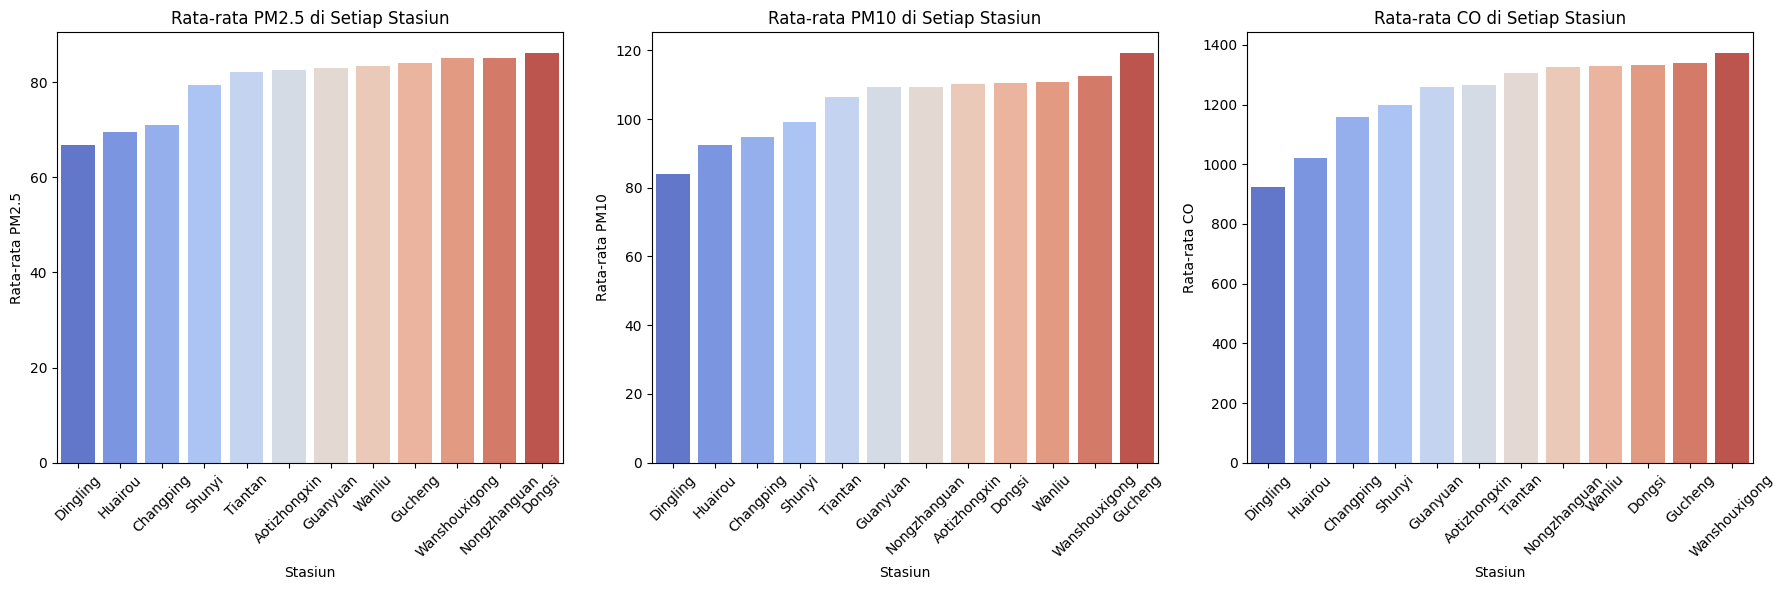

In [157]:
pollutants_pertanyaan2 = ["PM2.5", "PM10", "CO"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Tidak pakai sharey agar skala Y bebas

for i, pollutant in enumerate(pollutants_pertanyaan2):
    station_avg = all_data.groupby('station')[pollutant].mean().sort_values()
    sns.barplot(x=station_avg.index, y=station_avg.values, hue=station_avg.index, palette="coolwarm", ax=axes[i], legend=False)

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_xlabel('Stasiun')
    axes[i].set_ylabel(f'Rata-rata {pollutant}')
    axes[i].set_title(f'Rata-rata {pollutant} di Setiap Stasiun')

plt.tight_layout()
plt.show()

### Bagaimana perbandingan tingkat polusi udara pada pagi, siang, dan malam hari di setiap stasiun?

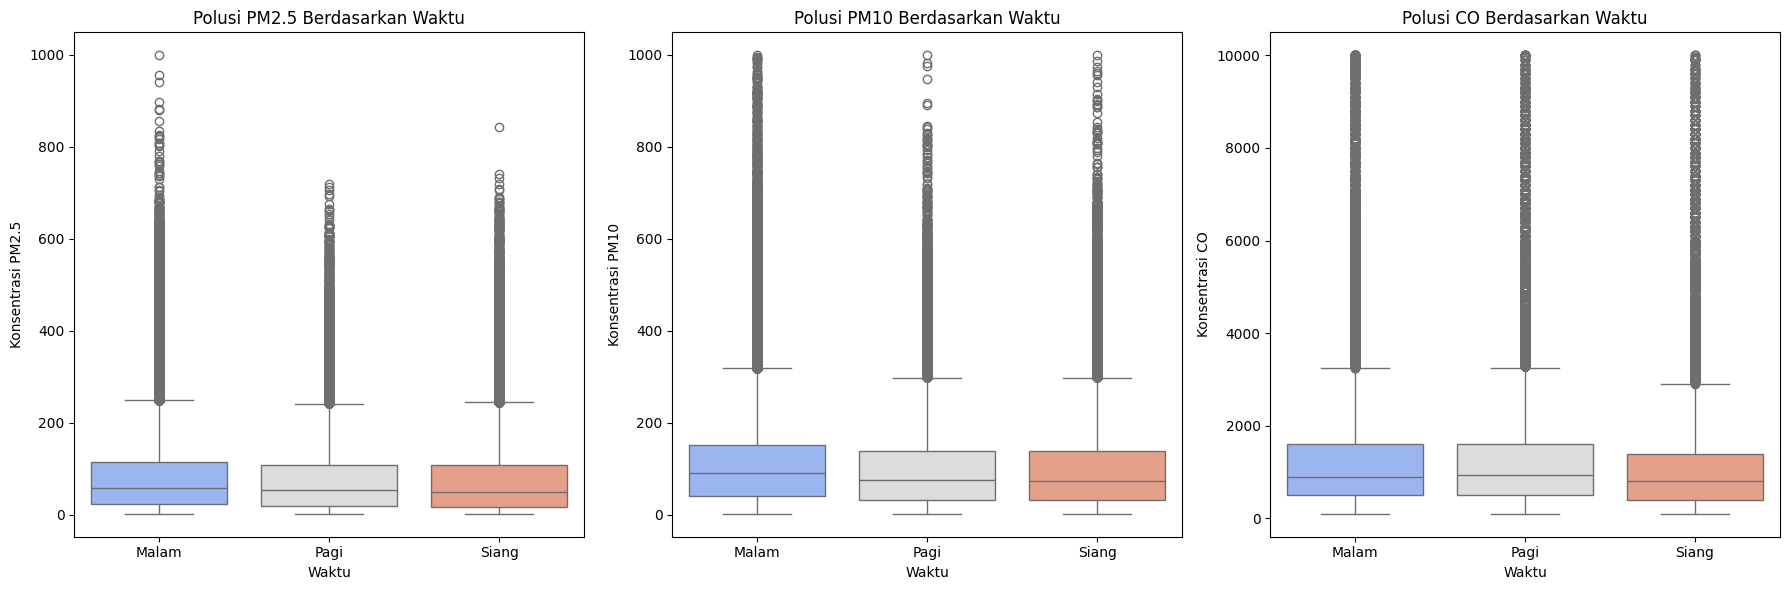

In [158]:
pollutants_pertanyaan3 = ["PM2.5", "PM10", "CO"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Tidak pakai sharey agar setiap polutan punya skala sendiri

for i, pollutant in enumerate(pollutants_pertanyaan3):
    sns.boxplot(x=all_data['time_category'], y=all_data[pollutant], hue=all_data['time_category'], palette="coolwarm", ax=axes[i], legend=False)

    axes[i].set_xlabel('Waktu')
    axes[i].set_ylabel(f'Konsentrasi {pollutant}')
    axes[i].set_title(f'Polusi {pollutant} Berdasarkan Waktu')

plt.tight_layout()
plt.show()

### **Insight:**
- Mengetahui tren polusi udara dari waktu ke waktu di setiap stasiun.
- Mengetahui Stasiun yang memiliki rata-rata tingkat polusi udara tertinggi dan terendah.
- Mengetahui tingkat polusi udara pada pagi, siang, dan malam hari di setiap stasiun.

## Analisis Lanjutan (Opsional) - K-Means Clustering

- Menggunakan K-Means untuk mengelompokkan stasiun berdasarkan polusi udara.
- Normalisasi data dilakukan dengan StandardScaler() agar semua variabel memiliki skala yang sama.
- Metode Elbow digunakan untuk menemukan jumlah cluster terbaik.
- Visualisasi hasil clustering dalam bentuk scatter plot.

In [189]:
# [1] Load Data (Gunakan data yang sudah di-merge sebelumnya)
df = all_data.copy()

In [190]:
# [2] Pilih fitur untuk clustering
features = ["PM2.5", "PM10", "NO2", "CO", "O3", "TEMP", "PRES", "WSPM"]
X = df.groupby("station")[features].mean()  # Hitung rata-rata polutan di setiap stasiun

In [191]:
# [3] Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

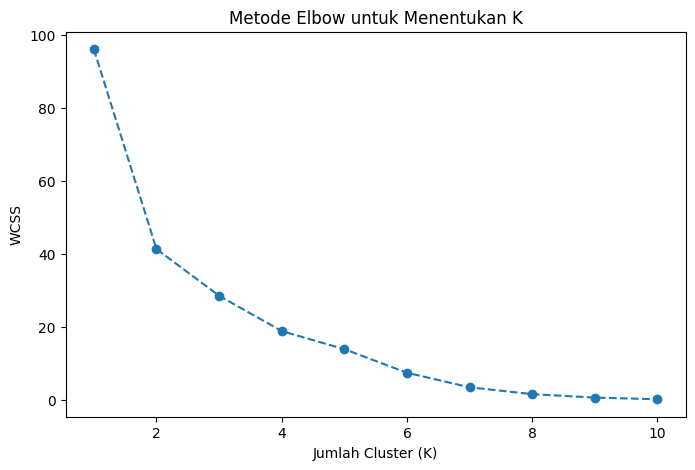

In [192]:
# [4] Tentukan jumlah cluster dengan Metode Elbow
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Metode Elbow untuk Menentukan K")
plt.show()

In [193]:
# Hapus kolom cluster jika sudah ada di all_data untuk menghindari konflik
if "cluster" in all_data.columns:
    all_data = all_data.drop(columns=["cluster"])
    
# [5] Jalankan K-Means dengan jumlah cluster optimal (misalnya K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Buat dataframe baru untuk menyimpan hasil clustering
station_clusters = pd.DataFrame({"station": X.index, "cluster": clusters})

# Gabungkan kembali cluster ke dalam `all_data`
all_data = all_data.merge(station_clusters, on="station", how="left")

# Cek hasilnya
print(all_data[["station", "cluster"]].drop_duplicates())

          station  cluster
0    Aotizhongxin        1
1       Changping        2
2        Dingling        2
3          Dongsi        1
4        Guanyuan        1
5         Gucheng        0
6         Huairou        2
7    Nongzhanguan        1
8          Shunyi        1
9         Tiantan        1
10         Wanliu        0
11  Wanshouxigong        1


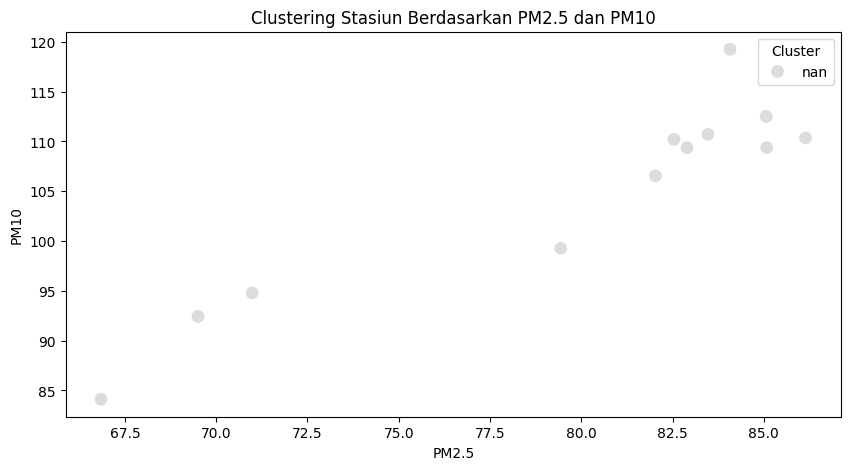

In [194]:
X["cluster"] = station_clusters["cluster"]  # Simpan cluster dalam X

# [6] Visualisasi Hasil Clustering
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=X["PM2.5"], 
    y=X["PM10"], 
    hue=X["cluster"].astype(str),  # Pastikan cluster ada di X
    palette="coolwarm", 
    s=100
)
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.title("Clustering Stasiun Berdasarkan PM2.5 dan PM10")
plt.legend(title="Cluster")
plt.show()

In [195]:
# [7] Tampilkan hasil cluster
print(X.sort_values("cluster"))

                   PM2.5        PM10        NO2           CO         O3  \
station                                                                   
Aotizhongxin   82.540623  110.210033  59.074106  1264.692405  55.328626   
Changping      70.986438   94.788575  44.206153  1156.990246  57.976253   
Dingling       66.845557   84.113713  27.303589   925.111838  70.530792   
Dongsi         86.144243  110.347617  53.953078  1331.913045  57.700357   
Guanyuan       82.897522  109.372349  58.139298  1258.327045  54.817142   
Gucheng        84.074802  119.261567  55.822315  1338.100060  58.000001   
Huairou        69.501747   92.422670  32.077275  1019.671871  60.872173   
Nongzhanguan   85.079472  109.384022  58.095053  1327.767611  58.432876   
Shunyi         79.437962   99.271936  44.094695  1197.904660  54.218810   
Tiantan        82.033097  106.537076  53.258828  1305.333262  56.148077   
Wanliu         83.467612  110.707858  65.668418  1328.761180  46.909375   
Wanshouxigong  85.067548 

## Conclusion

1. Conclution pertanyaan 1
    - Tren tahunan menunjukkan adanya fluktuasi dalam konsentrasi polutan.
    - Sebagian besar polutan (PM2.5, PM10, NO2, SO2, CO, O3) mengalami penurunan sekitar tahun dari 2014-2016, tetapi meningkat kembali pada tahun 2017.
2. Conclution pertanyaan 2
    - _Gucheng_ dan _Dongsi_ sering mencatatkan konsentrasi polutan yang lebih tinggi dibandingkan stasiun lainnya. 
    - _Huairou_ dan _Dingling_ memiliki tingkat polusi yang relatif lebih rendah.
3. Conclution pertanyaan 3
    - Tidak terdapat perbedaan yang signifikan dalam distribusi polusi PM2.5, PM10, dan CO berdasarkan kategori waktu (pagi, siang, malam).
    - Konsentrasi polusi cenderung seragam sepanjang hari dengan beberapa outlier yang cukup tinggi.